# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

To build a estimator model with the lowest error to predict Sales Price of houses sold in Ames

## Objective
 1) Read 'train.csv' to clean and organise data 
 
 2) Create a regression model based on the Ames Housing Dataser to predict the price of a house at sales in Ames, IA using train-test split
 
 3) Predict Sales Price using predictor values given in 'test.csv' to generate unknown data

## Executive Summary

### Contents:


## Data Dictionary



## Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from dython.nominal import associations

%matplotlib inline
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 400)

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from dython.nominal import associations
from sklearn.feature_selection import RFE

pd.set_option('display.max_columns', 500)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1) Data Preparation

### 1.1) Reading Data

In [454]:
df_main = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [455]:
df_main.shape

(2051, 81)

In [456]:
df_test.shape

(879, 80)

In [457]:
df_main.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

### 1.2) Cleaning Data

In [458]:
#Check if there are out of range value in each column manually for training data
df_main.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [459]:
#Highlight out of range value
df_main[df_main['Garage Yr Blt']==2207][['Year Built','Year Remod/Add','Garage Yr Blt']]

Year Built  Year Remod/Add  Garage Yr Blt
1699        2006            2007         2207.0

In [460]:
#Probably a typo error, assume Garage year built to be same as year remod
df_main.at[1699,'Garage Yr Blt'] = 2007

In [461]:
#Check if there are out of range value in each column manually for testing data
df_test.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count   879.000000  8.790000e+02   879.000000    719.000000     879.000000   
mean   1445.588168  7.165050e+08    58.270762     69.630042   10340.920364   
std     850.717105  1.889135e+08    42.211389     23.625372   10047.335167   
min       2.000000  5.263021e+08    20.000000     21.000000    1477.000000   
25%     692.500000  5.284861e+08    20.000000     59.000000    7298.500000   
50%    1435.000000  5.354542e+08    50.000000     68.000000    9453.000000   
75%    2197.000000  9.071921e+08    70.000000     80.000000   11606.500000   
max    2928.000000  1.007100e+09   190.000000    182.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count    879.000000    879.000000   879.000000      879.000000    878.000000   
mean       6.054608      5.565415  1970.533561     1984.444824    106.982916   
std        1.374756      1.128422    30.403527       20.454546    188.356829   
min        2.000000      1.000000  1880.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1967.000000      0.000000   
50%        6.000000      5.000000  1972.000000     1992.000000      0.000000   
75%        7.000000      6.000000  2000.000000     2003.000000    173.500000   
max       10.000000      9.000000  2010.000000     2010.000000   1378.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count    879.000000    879.000000   879.000000     879.000000   879.000000   
mean     443.397042     53.835040   539.518771    1036.750853  1148.053470   
std      442.480223    178.539854   426.082726     419.258428   381.022337   
min        0.000000      0.000000     0.000000       0.000000   407.000000   
25%        0.000000      0.000000   216.000000     790.000000   864.000000   
50%      374.000000      0.000000   453.000000     975.000000  1064.000000   
75%      735.500000      0.000000   781.500000    1248.000000  1358.000000   
max     2288.000000   1526.000000  2046.000000    3138.000000  3138.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count   879.000000       879.000000   879.000000      879.000000   
mean    349.751991         2.725825  1500.531286        0.440273   
std     434.595133        32.554124   517.413260        0.529983   
min       0.000000         0.000000   407.000000        0.000000   
25%       0.000000         0.000000  1114.000000        0.000000   
50%       0.000000         0.000000  1436.000000        0.000000   
75%     720.000000         0.000000  1781.000000        1.000000   
max    2065.000000       481.000000  4676.000000        2.000000   

       Bsmt Half Bath   Full Bath   Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count      879.000000  879.000000  879.000000     879.000000     879.000000   
mean         0.055745    1.541524    0.399317       2.879408       1.047782   
std          0.229560    0.560908    0.506045       0.830249       0.223844   
min          0.000000    0.000000    0.000000       0.000000       0.000000   
25%          0.000000    1.000000    0.000000       2.000000       1.000000   
50%          0.000000    2.000000    0.000000       3.000000       1.000000   
75%          0.000000    2.000000    1.000000       3.000000       1.000000   
max          1.000000    4.000000    2.000000       6.000000       3.000000   

       TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count     879.000000  879.000000     834.000000   879.000000   879.000000   
mean        6.459613    0.618885    1976.796163     1.744027   470.832765   
std         1.603071    0.669313      25.695683     0.751162   213.070155   
min         3.000000    0.000000    1900.000000     0.000000     0.000000   
25%         5.000000    0.000000    1960.000000     1.000000   323.000000   
50%         6.000000    1.000000    1978.000000     2.000000   473.000000   
75%         7.000000    1

In [462]:
#Write function to check and display only columns with null value
def displaynull(data, filternum = 0):
    count = 0
    t_dict = data.isnull().sum().to_dict()
    if filternum == 0: #filternum allow additional filtering of null value above specified %
        print('Number of Null values in columns with Null values:')
        for i, k in enumerate (data):
            if t_dict[k] != 0:
                print(k + ': '+ str(t_dict[k]) + ', ' + str(round(100*t_dict[k]/2051,1)) + '%')
            else: 
                count+=1
        if count == len(t_dict):
            print("Hurray! There are no more null value in your data!")
    else: 
        print('Columns with more than {}% Null values:'.format(filternum))
        for i, k in enumerate (t_dict):
            if round(100*t_dict[k]/2051) >= filternum:
                print(k + ': '+ str(t_dict[k]) + ', ' + str(round(100*t_dict[k]/2051,1)) + '%')

In [463]:
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Alley: 1911, 93.2%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Qual: 55, 2.7%
Bsmt Cond: 55, 2.7%
Bsmt Exposure: 58, 2.8%
BsmtFin Type 1: 55, 2.7%
BsmtFin SF 1: 1, 0.0%
BsmtFin Type 2: 56, 2.7%
BsmtFin SF 2: 1, 0.0%
Bsmt Unf SF: 1, 0.0%
Total Bsmt SF: 1, 0.0%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Fireplace Qu: 1000, 48.8%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%
Pool QC: 2042, 99.6%
Fence: 1651, 80.5%
Misc Feature: 1986, 96.8%


From the data dictionary, we know that columns with float data type are not suppose to have null value. Whereas some columns with object data type has intentional null value which should not be ignored. 

In [464]:
df_main.dtypes #checking data type

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [465]:
#Converting all numerical variable to float type

#Define which column to be numerical and catagorical
catagorical = ['PID', 'MS SubClass','MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilies', 'Lot Config', 
               'Land Slope','Neighborhood', 'Condition 1', 'Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
               'Exterior 1st','Exterior 2nd','Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond',
               'Exter Cond','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
               'BsmtFin Type 2','Heating','Heating QC','Central Air','Electrical','Kitchen Qual','Functional','Fireplace Qu',
               'Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence','Misc Feature',
               'Sale Type','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold','Overall Qual','Overall Cond',
               'Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Kitchen Qual',
              'TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars']

numerical = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF ',
             '1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
             '3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']

#Training Data
for i in df_main:
    if df_main[i].dtypes == 'int64' and i not in catagorical:
        df_main[i] = df_main[i].astype(float)
#df_main['Year Built'] = df_main['Year Built'].astype(int,errors='ignore')
#df_main['Year Remod/Add'] =df_main['Year Remod/Add'].astype(int,errors='ignore')
#df_main['Garage Yr Blt'] = df_main['Garage Yr Blt'].astype(int,errors='ignore')
#df_main['Mo Sold'] = df_main['Mo Sold'].astype(int,errors='ignore')
#df_main['Yr Sold'] = df_main['Yr Sold'].astype(int,errors='ignore')
        
# Testing Data
for i in df_test:
     if df_main[i].dtypes == 'int64' and i not in catagorical:
        df_test[i] = df_test[i].astype(float)
df_test['Garage Cars'] = df_test['Garage Cars'].astype('float')
#df_test['Year Built'] = df_test['Year Built'].astype(int,errors='ignore')
#df_test['Year Remod/Add'] = df_test['Year Remod/Add'].astype(int,errors='ignore')
#df_test['Garage Yr Blt'] = df_test['Garage Yr Blt'].astype(int,errors='ignore')
#df_test['Mo Sold'] = df_test['Mo Sold'].astype(int,errors='ignore')
#df_test['Yr Sold'] = df_test['Yr Sold'].astype(int,errors='ignore')


In [466]:
df_main.dtypes #checking data type

Id                float64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area          float64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [467]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

#### 1.2.1) Handling Null Values

#### 1.2.1.1) Dropping columns

In [468]:
displaynull(df_main, filternum = 40)

Columns with more than 40% Null values:
Alley: 1911, 93.2%
Fireplace Qu: 1000, 48.8%
Pool QC: 2042, 99.6%
Fence: 1651, 80.5%
Misc Feature: 1986, 96.8%


The null values in the 5 columns above indicate that there is no such facilities in the houses in the training data given. Since there will not be enough data to fit these variable into a model for unknown sales price prediction, we can drop these columns.

In [469]:
print(df_main.shape)
print(df_test.shape)

(2051, 81)
(879, 80)


In [470]:
todrop = ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
df_main.drop(todrop,axis=1,inplace = True) #For Training data
df_test.drop(todrop,axis=1,inplace = True) #For Testing data

print(df_main.shape)
print(df_test.shape)

(2051, 76)
(879, 75)


#### 1.2.2) Filling and Dropping null rows for training data

In [471]:
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Qual: 55, 2.7%
Bsmt Cond: 55, 2.7%
Bsmt Exposure: 58, 2.8%
BsmtFin Type 1: 55, 2.7%
BsmtFin SF 1: 1, 0.0%
BsmtFin Type 2: 56, 2.7%
BsmtFin SF 2: 1, 0.0%
Bsmt Unf SF: 1, 0.0%
Total Bsmt SF: 1, 0.0%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [472]:
#Checking null value for BsmtFin SF1, BsmtFin SFs, Bsmt Unf SF and Total Bsmt SF

#Check if all various basement square feet value add up to toal basement square feet value
check1 = df_main['Total Bsmt SF'] == df_main['BsmtFin SF 1'] + df_main['BsmtFin SF 2'] + df_main['Bsmt Unf SF']
check2 = df_main['Total Bsmt SF'] != df_main['BsmtFin SF 1'] + df_main['BsmtFin SF 2'] + df_main['Bsmt Unf SF']
print(len(df_main[check1]))
print(len(df_main[check2]))

2050
1


In [473]:
#Display that 1 row which number doesn't add up to total basement square feet value
df_main[check2][['Total Bsmt SF','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF']]

Total Bsmt SF  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF
1327            NaN           NaN           NaN          NaN

There is only 1 null value in Total Bsmt SF, which represent the square feet sum of all Basement type. Since we can observe that all basement data is not available in that particular row where is null, we assume that there is no basement in that particular house and replace null values with 0. 

For the remaining 2050 row, since all sum of different type of basement square feet tally with total basement square feet, we can replace all null value with 0 for column 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2' and 'Bsmt Unf SF'. 

In [474]:
df_main['Total Bsmt SF'].fillna(0, inplace = True)
df_main['BsmtFin SF 1'].fillna(0, inplace = True)
df_main['BsmtFin SF 2'].fillna(0, inplace = True)
df_main['Bsmt Unf SF'].fillna(0, inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Qual: 55, 2.7%
Bsmt Cond: 55, 2.7%
Bsmt Exposure: 58, 2.8%
BsmtFin Type 1: 55, 2.7%
BsmtFin Type 2: 56, 2.7%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [475]:
#Check if null value of variouse basement related columns are houses without basement
len(df_main[(df_main['Total Bsmt SF'] == 0) & df_main['Bsmt Qual'].isnull() & df_main['Bsmt Cond'].isnull() & df_main['Bsmt Exposure'].isnull() & df_main['BsmtFin Type 1'].isnull() & df_main['BsmtFin Type 1'].isnull()])

55

In [476]:
#Check remaining accoutned for null values of basement related columns
df_main[(df_main['Total Bsmt SF'] != 0) & df_main['Bsmt Exposure'].isnull()][['Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','BsmtFin SF 2', 'Total Bsmt SF']]

Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  BsmtFin SF 2  Total Bsmt SF
1456           NaN            Unf            Unf           0.0          725.0
1547           NaN            Unf            Unf           0.0         1595.0
1997           NaN            Unf            Unf           0.0          936.0

In [477]:
#Replace null values to 'Unf' for these 3 rows as houses for these basement are unfinished 
df_main.at[1456,'Bsmt Exposure'] = 'Unf'
df_main.at[1547,'Bsmt Exposure'] = 'Unf'
df_main.at[1997,'Bsmt Exposure'] = 'Unf'

In [478]:
#Locat emissing data in column 'BsmtFin Type 2'
df_main[(df_main['Total Bsmt SF'] != 0) & df_main['BsmtFin Type 2'].isnull()][['Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','BsmtFin SF 2', 'Total Bsmt SF']]

Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  BsmtFin SF 2  Total Bsmt SF
1147            No            GLQ            NaN         479.0         3206.0

In [479]:
df_main['BsmtFin Type 2'].value_counts() #finding mode of column 

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [480]:
#Replace the missing data in column 'BsmtFin Type 2' with the mode of the column
df_main.at[1147,'BsmtFin Type 2'] = 'Unf'
#fill remaining accounted for null values in basement related column with 'NA'
df_main['Bsmt Qual'].fillna('NA', inplace = True)
df_main['Bsmt Cond'].fillna('NA', inplace = True)
df_main['Bsmt Exposure'].fillna('NA', inplace = True)
df_main['BsmtFin Type 1'].fillna('NA', inplace = True)
df_main['BsmtFin Type 2'].fillna('NA', inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Bsmt Full Bath: 2, 0.1%
Bsmt Half Bath: 2, 0.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [481]:
#Null value in 'Bsmt Full Bath' & 'Bsmt Half Bath' is null as the houses as no basement
df_main[(df_main['Bsmt Full Bath'].isnull()) & (df_main['Bsmt Half Bath'].isnull())][['Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]

Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath
616             0.0             NaN             NaN
1327            0.0             NaN             NaN

In [482]:
#replace null value with 0 for these 2 columns
df_main['Bsmt Full Bath'].fillna(0, inplace = True)
df_main['Bsmt Half Bath'].fillna(0, inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Mas Vnr Type: 22, 1.1%
Mas Vnr Area: 22, 1.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [483]:
#Check if null value in Mas Vnr Type and Mas Vnr Area are in the same row
check3 = df_main[(df_main['Mas Vnr Type'].isnull()) & (df_main['Mas Vnr Area'].isnull())][['Mas Vnr Type','Mas Vnr Area']]
print(len(check3))
check3

22


Mas Vnr Type  Mas Vnr Area
22            NaN           NaN
41            NaN           NaN
86            NaN           NaN
212           NaN           NaN
276           NaN           NaN
338           NaN           NaN
431           NaN           NaN
451           NaN           NaN
591           NaN           NaN
844           NaN           NaN
913           NaN           NaN
939           NaN           NaN
1025          NaN           NaN
1244          NaN           NaN
1306          NaN           NaN
1430          NaN           NaN
1434          NaN           NaN
1606          NaN           NaN
1699          NaN           NaN
1815          NaN           NaN
1820          NaN           NaN
1941          NaN           NaN

Since all null value in Mas Vnr Type are in the same row as Mas Vnr Area, we can assume that houses in these 22 rows do not have masonry veneer in it and convert null values in Mas Vnr Type to 'NA' and Mas Vnr Area to 0.  

In [484]:
df_main['Mas Vnr Type'].fillna('NA', inplace = True)
df_main['Mas Vnr Area'].fillna(0, inplace = True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%
Garage Type: 113, 5.5%
Garage Yr Blt: 114, 5.6%
Garage Finish: 114, 5.6%
Garage Cars: 1, 0.0%
Garage Area: 1, 0.0%
Garage Qual: 114, 5.6%
Garage Cond: 114, 5.6%


In [485]:
#check for no.of rows which Garage Type, Garage Yr Blt, Garage Finish, Garage Qual and Garage Cond are all null
check4 = df_main[df_main['Garage Type'].isnull() & df_main['Garage Yr Blt'].isnull() & df_main['Garage Finish'].isnull() & df_main['Garage Qual'].isnull() & df_main['Garage Cond'].isnull()] 
print(len(check4))

113


In [486]:
#113 houses do not has garage, hence we can fill the null value with 'NA'
df_main['Garage Type'].fillna('NA', inplace=True)
#Fill null with 'NA' for the rest of the columns except the extra one roll where Garage Type, Yr Blt, Finish, Qual and Cond null value doesn't tally
check5 = (df_main['Garage Type'] != 'NA') & (df_main['Garage Yr Blt'].isnull())
df_main[check5][['Year Built','Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond','Garage Cars','Garage Area']]

Year Built Garage Type  Garage Yr Blt Garage Finish Garage Qual  \
1712        1923      Detchd            NaN           NaN         NaN   

     Garage Cond  Garage Cars  Garage Area  
1712         NaN          NaN          NaN

In [487]:
#Finding mode
df_main['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [488]:
#Finding mode
df_main['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [489]:
#Finding mode
df_main['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [490]:
#As there is only 1 row with missing data related to garage
#let's assume the garage is built as the same year the house is built
#Fill in the remaining null value with mode of each column
df_main.at[1712,'Garage Yr Blt'] = 1923
df_main.at[1712,'Garage Finish'] = 'RFn'
df_main.at[1712,'Garage Qual'] = 'TA'
df_main.at[1712,'Garage Cond'] = 'TA'
#Fill in numerical value garage value with mean of each coulmn
df_main.at[1712,'Garage Cars'] = df_main['Garage Cars'].mode()
df_main['Garage Area'].fillna(df_main['Garage Area'].mean(),inplace=True)

In [491]:
#fill null with 'NA' for the 4 columns below for houses with no garage
df_main['Garage Yr Blt'].fillna(0,inplace=True)
df_main['Garage Finish'].fillna('NA',inplace=True)
df_main['Garage Qual'].fillna('NA',inplace=True)
df_main['Garage Cond'].fillna('NA',inplace=True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Lot Frontage: 330, 16.1%


In [492]:
#Check if there are houses with no lot frontage
len(df_main[(df_main['Lot Frontage'].isnull()) & (df_main['Lot Area'] == 0)])

0

In [493]:
#Replace null value in Lot Frontage with mean of the column since there are no houses with no lot frontage
df_main['Lot Frontage'].fillna(df_main['Lot Frontage'].mean(),inplace=True)
#Checking remaining null values again
displaynull(df_main)

Number of Null values in columns with Null values:
Hurray! There are no more null value in your data!


#### 1.2.3) Filling and Dropping null rows for testing data

In [494]:
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Lot Frontage: 160, 7.8%
Mas Vnr Type: 1, 0.0%
Mas Vnr Area: 1, 0.0%
Bsmt Qual: 25, 1.2%
Bsmt Cond: 25, 1.2%
Bsmt Exposure: 25, 1.2%
BsmtFin Type 1: 25, 1.2%
BsmtFin Type 2: 25, 1.2%
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [495]:
#Check if there are houses with no lot frontage
len(df_test[(df_test['Lot Frontage'].isnull()) & (df_test['Lot Area'] == 0)])

0

In [496]:
#Replace null value in Lot Frontage with mean of the column since there are no houses with no frontage
df_test['Lot Frontage'].fillna(df_test['Lot Frontage'].mean(),inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Mas Vnr Type: 1, 0.0%
Mas Vnr Area: 1, 0.0%
Bsmt Qual: 25, 1.2%
Bsmt Cond: 25, 1.2%
Bsmt Exposure: 25, 1.2%
BsmtFin Type 1: 25, 1.2%
BsmtFin Type 2: 25, 1.2%
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [497]:
#Check if houses has masonry veneer 
df_test[(df_test['Mas Vnr Type'].isnull()) & (df_test['Mas Vnr Area'].isnull())][['Mas Vnr Type','Mas Vnr Area']]

Mas Vnr Type  Mas Vnr Area
866          NaN           NaN

In [498]:
#fill null value as 'NA' and 0 for both columns
df_test['Mas Vnr Type'].fillna('NA',inplace=True)
df_test['Mas Vnr Area'].fillna(0,inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Bsmt Qual: 25, 1.2%
Bsmt Cond: 25, 1.2%
Bsmt Exposure: 25, 1.2%
BsmtFin Type 1: 25, 1.2%
BsmtFin Type 2: 25, 1.2%
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [499]:
#Check if null value of variouse basement related columns are houses without basement
len(df_test[(df_test['Total Bsmt SF'] == 0) & df_test['Bsmt Qual'].isnull() & df_test['Bsmt Cond'].isnull() & df_test['Bsmt Exposure'].isnull() & df_test['BsmtFin Type 1'].isnull() & df_test['BsmtFin Type 1'].isnull()])

25

In [500]:
#Fill null values of basement related columns with 'NA' since it represents the houses do not have basement
df_test['Bsmt Qual'].fillna('NA',inplace=True)
df_test['Bsmt Cond'].fillna('NA',inplace=True)
df_test['Bsmt Exposure'].fillna('NA',inplace=True)
df_test['BsmtFin Type 1'].fillna('NA',inplace=True)
df_test['BsmtFin Type 2'].fillna('NA',inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Electrical: 1, 0.0%
Garage Type: 44, 2.1%
Garage Yr Blt: 45, 2.2%
Garage Finish: 45, 2.2%
Garage Qual: 45, 2.2%
Garage Cond: 45, 2.2%


In [501]:
#Check how many houses do not have garage in test data
check6 = df_test[df_test['Garage Type'].isnull() & df_test['Garage Yr Blt'].isnull() & df_test['Garage Finish'].isnull() & df_test['Garage Qual'].isnull() & df_test['Garage Cond'].isnull()] 
print(len(check6))

44


In [502]:
#fill null value of Garage type as 'NA' as it means the houses do not have garage
df_test['Garage Type'].fillna('NA', inplace=True)
#Fill null with 'NA' for the rest of the columns except the extra one roll where Garage Type, Yr Blt, Finish, Qual and Cond null value doesn't tally
check7 = (df_test['Garage Type'] != 'NA') & (df_test['Garage Yr Blt'].isnull())
df_test[check7][['Year Built','Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']]

Year Built Garage Type  Garage Yr Blt Garage Finish Garage Qual  \
765        1910      Detchd            NaN           NaN         NaN   

    Garage Cond  
765         NaN

In [503]:
#Finding mode
df_test['Garage Finish'].value_counts()

Unf    382
RFn    233
Fin    219
Name: Garage Finish, dtype: int64

In [504]:
#Finding mode
df_test['Garage Qual'].value_counts()

TA    783
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

In [505]:
#Finding mode
df_test['Garage Cond'].value_counts()

TA    797
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

In [506]:
#As there is only 1 row with missing data related to garage
#let's assume the garage is built as the same year the house is built
#Fill in the remaining null value with mode of each column
df_test.at[765,'Garage Yr Blt'] = 1910
df_test.at[765,'Garage Finish'] = 'RFn'
df_test.at[765,'Garage Qual'] = 'TA'
df_test.at[765,'Garage Cond'] = 'TA'

#fill null with 'NA' for the 4 columns below for houses with no garage
df_test['Garage Yr Blt'].fillna(0,inplace=True)
df_test['Garage Finish'].fillna('NA',inplace=True)
df_test['Garage Qual'].fillna('NA',inplace=True)
df_test['Garage Cond'].fillna('NA',inplace=True)
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Electrical: 1, 0.0%


In [507]:
#find mode of electircal column
df_test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [508]:
df_test[df_test['Electrical'].isnull()]['Electrical']

635    NaN
Name: Electrical, dtype: object

In [509]:
#Fill null value with mode
df_test.at[635,'Electrical'] = 'SBrkr'
#Checking remaining null values again
displaynull(df_test)

Number of Null values in columns with Null values:
Hurray! There are no more null value in your data!


### 1.4) Combine/remove columns that are not needed

In [510]:
#corr[corr>0.5]
df_main.shape

(2051, 76)

In [511]:
df_main.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  109.0  533352170           60        RL       69.0552   13517.0   Pave   
1  544.0  531379050           60        RL       43.0000   11492.0   Pave   
2  153.0  535304180           20        RL       68.0000    7922.0   Pave   
3  318.0  916386060           60        RL       73.0000    9802.0   Pave   
4  255.0  906425045           50        RL       82.0000   14235.0   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr       725.0       754.0              0.0       1479.0   
1      SBrkr       913.0      1209.0              0.0       2122.0   
2      SBrkr      1057.0         0.0              0.0       1057.0   
3      SBrkr       744.0       700.0              0.0       1444.0   
4      SBrkr       831.0       614.0              0.0       1445.0   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3  

In [512]:
#Drop ID and PID
#Training data
df_main.drop('Id',axis=1,inplace=True)
df_main.drop('PID',axis=1,inplace=True)

#Testing data
df_test_Id = df_test['Id']
df_test.drop('Id',axis=1,inplace=True)
df_test.drop('PID',axis=1,inplace=True)

In [513]:
#List all columns that shows area of the house
t_area = ['Lot Area','Mas Vnr Area','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF',
          'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area']
len(t_area)

14

In [514]:
#Assign main dataframe as df_train
df_train = df_main
#Create 'Total SF'
#Train
df_train['Total SF'] = df_train[t_area[0]] + df_train[t_area[1]] + df_train[t_area[2]] + df_train[t_area[3]] + df_train[t_area[4]] + df_train[t_area[5]] + df_train[t_area[6]] + df_train[t_area[7]] + df_train[t_area[8]] + df_train[t_area[9]] + df_train[t_area[10]] + df_train[t_area[11]] + df_train[t_area[12]] + df_train[t_area[13]]
print(df_train.shape)
#Test
df_test['Total SF'] = df_test[t_area[0]] + df_test[t_area[1]] + df_test[t_area[2]] + df_test[t_area[3]] + df_test[t_area[4]] + df_test[t_area[5]] + df_test[t_area[6]] + df_test[t_area[7]] + df_test[t_area[8]] + df_test[t_area[9]] + df_test[t_area[10]] + df_test[t_area[11]] + df_test[t_area[12]] + df_test[t_area[13]]
print(df_test.shape)


(2051, 75)
(879, 74)


In [515]:
#Dropping all area columns since it is represented by Total SF
for i in t_area:
    df_train.drop(i,axis=1,inplace=True)
    df_test.drop(i,axis=1,inplace=True)

#Train
df_train.drop('BsmtFin SF 1',axis=1,inplace=True)
df_train.drop('BsmtFin SF 2',axis=1,inplace=True)
df_train.drop('Bsmt Unf SF',axis=1,inplace=True)
#Test
df_test.drop('BsmtFin SF 1',axis=1,inplace=True)
df_test.drop('BsmtFin SF 2',axis=1,inplace=True)
df_test.drop('Bsmt Unf SF',axis=1,inplace=True)

print(df_train.shape)
print(df_test.shape)

(2051, 58)
(879, 57)


In [516]:
#Compute total number of bath room in each house
df_train['Total Bath'] = df_train['Bsmt Full Bath'] + df_train['Full Bath'] + 0.5*(df_train['Bsmt Half Bath']+df_train['Half Bath'])
df_test['Total Bath'] = df_test['Bsmt Full Bath'] + df_test['Full Bath'] + 0.5*(df_test['Bsmt Half Bath']+df_test['Half Bath'])
#Drop used columns since it is represented by Total Bath
df_train.drop('Bsmt Full Bath',axis=1,inplace=True)
df_train.drop('Full Bath',axis=1,inplace=True)
df_train.drop('Bsmt Half Bath',axis=1,inplace=True)
df_train.drop('Half Bath',axis=1,inplace=True)

df_test.drop('Bsmt Full Bath',axis=1,inplace=True)
df_test.drop('Full Bath',axis=1,inplace=True)
df_test.drop('Bsmt Half Bath',axis=1,inplace=True)
df_test.drop('Half Bath',axis=1,inplace=True)

print(df_train.shape)
print(df_test.shape)

(2051, 55)
(879, 54)


In [517]:
#Compute Age of house when sold and check if remodification was done 
df_train['Age'] = df_train['Yr Sold'] - df_train['Year Built']
df_train['Remod'] = df_train['Year Remod/Add'] - df_train['Year Built']
df_train['Remod'] = [1 if i>0 else 0 for i in df_train['Remod']]

df_test['Age'] = df_test['Yr Sold'] - df_test['Year Built']
df_test['Remod'] = df_test['Year Remod/Add'] - df_test['Year Built']
df_test['Remod'] = [1 if i>0 else 0 for i in df_test['Remod']]

#Compute Age of Garage when sold
df_train['Age Garage'] = df_train['Yr Sold'] - df_train['Garage Yr Blt'].astype('int')
df_test['Age Garage'] = df_test['Yr Sold'] - df_test['Garage Yr Blt'].astype('int')

#Drop Yr Sold and Year Built
df_train.drop('Yr Sold',axis=1,inplace=True)
df_train.drop('Year Built',axis=1,inplace=True)
df_train.drop('Year Remod/Add',axis=1,inplace=True)
df_train.drop('Garage Yr Blt',axis=1,inplace=True)

df_test.drop('Yr Sold',axis=1,inplace=True)
df_test.drop('Year Built',axis=1,inplace=True)
df_test.drop('Year Remod/Add',axis=1,inplace=True)
df_test.drop('Garage Yr Blt',axis=1,inplace=True)

print(df_train.shape)
print(df_test.shape)

(2051, 54)
(879, 53)


In [518]:
df_train.head()

MS SubClass MS Zoning  Lot Frontage Street Lot Shape Land Contour  \
0           60        RL       69.0552   Pave       IR1          Lvl   
1           60        RL       43.0000   Pave       IR1          Lvl   
2           20        RL       68.0000   Pave       Reg          Lvl   
3           60        RL       73.0000   Pave       Reg          Lvl   
4           50        RL       82.0000   Pave       IR1          Lvl   

  Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2  \
0    AllPub    CulDSac        Gtl       Sawyer        RRAe        Norm   
1    AllPub    CulDSac        Gtl      SawyerW        Norm        Norm   
2    AllPub     Inside        Gtl        NAmes        Norm        Norm   
3    AllPub     Inside        Gtl       Timber        Norm        Norm   
4    AllPub     Inside        Gtl      SawyerW        Norm        Norm   

  Bldg Type House Style  Overall Qual  Overall Cond Roof Style Roof Matl  \
0      1Fam      2Story             6             8      Gable   CompShg   
1      1Fam      2Story             7             5      Gable   CompShg   
2      1Fam      1Story             5             7      Gable   CompShg   
3      1Fam      2Story             5             5      Gable   CompShg   
4      1Fam      1.5Fin             6             8      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond Foundation  \
0      HdBoard      Plywood      BrkFace         Gd         TA     CBlock   
1      VinylSd      VinylSd      BrkFace         Gd         TA      PConc   
2      VinylSd      VinylSd         None         TA         Gd     CBlock   
3      VinylSd      VinylSd         None         TA         TA      PConc   
4      Wd Sdng      Plywood         None         TA         TA      PConc   

  Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating  \
0        TA        TA            No            GLQ            Unf    GasA   
1        Gd        TA            No            GLQ            Unf    GasA   
2        TA        TA            No            GLQ            Unf    GasA   
3        Gd        TA            No            Unf            Unf    GasA   
4        Fa        Gd            No            Unf            Unf    GasA   

  Heating QC Central Air Electrical  Bedroom AbvGr  Kitchen AbvGr  \
0         Ex           Y      SBrkr              3              1   
1         Ex           Y      SBrkr              4              1   
2         TA           Y      SBrkr              3              1   
3         Gd           Y      SBrkr              3              1   
4         TA           Y      SBrkr              3              1   

  Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Garage Type  \
0           Gd              6        Typ           0      Attchd   
1           Gd              8        Typ           1      Attchd   
2           Gd              5        Typ           0      Detchd   
3           TA              7        Typ           0     BuiltIn   
4           TA              6        Typ           0      Detchd   

  Garage Finish  Garage Cars Garage Qual Garage Cond Paved Drive  Misc Val  \
0           RFn          2.0          TA          TA           Y       0.0   
1           RFn          2.0          TA          TA           Y       0.0   
2           Unf          1.0          TA          TA           Y       0.0   
3           Fin          2.0          TA          TA           Y       0.0   
4           Unf          2.0          TA          TA           N       0.0   

   Mo Sold Sale Type  SalePrice  Total SF  Total Bath  Age  Remod  Age Garage  
0        3       WD    130500.0   18008.0         2.5   34      1          34  
1        4       WD    220000.0   17414.0         3.5   13      1          12  
2        1       WD    109000.0   11391.0         2.0   57      1          57  
3        4       WD    174000.0   13574.0         2.5    4      1           3  
4        3       WD    138500.0   18344.0        

In [519]:
df_test.head()

MS SubClass MS Zoning  Lot Frontage Street Lot Shape Land Contour  \
0          190        RM     69.000000   Pave       Reg          Lvl   
1           90        RL     69.630042   Pave       IR1          Lvl   
2           60        RL     58.000000   Pave       IR1          Lvl   
3           30        RM     60.000000   Pave       Reg          Lvl   
4           20        RL     69.630042   Pave       IR1          Lvl   

  Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2  \
0    AllPub     Inside        Gtl      OldTown        Norm        Norm   
1    AllPub     Inside        Gtl       Sawyer        Norm        Norm   
2    AllPub     Inside        Gtl      Gilbert        Norm        Norm   
3    AllPub     Inside        Gtl      OldTown        Norm        Norm   
4    AllPub     Inside        Gtl        NAmes        Norm        Norm   

  Bldg Type House Style  Overall Qual  Overall Cond Roof Style Roof Matl  \
0    2fmCon      2Story             6             8      Gable   CompShg   
1    Duplex      1Story             5             4      Gable   CompShg   
2      1Fam      2Story             7             5      Gable   CompShg   
3      1Fam      1Story             5             6      Gable   CompShg   
4      1Fam      1Story             6             5      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond Foundation  \
0      AsbShng      AsbShng         None         TA         Fa      Stone   
1      Plywood      Plywood         None         TA         TA     CBlock   
2      VinylSd      VinylSd         None         Gd         TA      PConc   
3      Wd Sdng      Wd Sdng         None         Gd         TA     CBlock   
4      Plywood      Plywood      BrkFace         TA         TA     CBlock   

  Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating  \
0        Fa        TA            No            Unf            Unf    GasA   
1        Gd        TA            No            Unf            Unf    GasA   
2        Gd        Gd            Av            GLQ            Unf    GasA   
3        TA        TA            No            Unf            Unf    GasA   
4        Gd        TA            No            BLQ            Unf    GasA   

  Heating QC Central Air Electrical  Bedroom AbvGr  Kitchen AbvGr  \
0         Gd           N      FuseP              4              2   
1         TA           Y      SBrkr              6              2   
2         Ex           Y      SBrkr              3              1   
3         TA           Y      SBrkr              2              1   
4         Gd           Y      SBrkr              3              1   

  Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Garage Type  \
0           Fa              9        Typ           0      Detchd   
1           TA             10        Typ           0      Attchd   
2           Gd              7        Typ           1      Attchd   
3           TA              5        Typ           0      Detchd   
4           TA              6        Typ           2      Attchd   

  Garage Finish  Garage Cars Garage Qual Garage Cond Paved Drive  Misc Val  \
0           Unf          1.0          Po          Po           Y         0   
1           Fin          2.0          TA          TA           Y         0   
2           RFn          2.0          TA          TA           Y         0   
3           Unf          2.0          Fa          TA           N         0   
4           RFn          2.0          TA          TA           Y         0   

   Mo Sold Sale Type  Total SF  Total Bath  Age  Remod  Age Garage  
0        4       WD    14630.0         2.0   96      1          96  
1        8       WD    16313.0         2.0   29      0          29  
2        9       New   21300.0         3.5    0      0           0  
3        7       WD    12088.0         1.0   84      1          72  
4        7       WD    14704.0         2.5   46      0          46

In [520]:
df_train.head()

MS SubClass MS Zoning  Lot Frontage Street Lot Shape Land Contour  \
0           60        RL       69.0552   Pave       IR1          Lvl   
1           60        RL       43.0000   Pave       IR1          Lvl   
2           20        RL       68.0000   Pave       Reg          Lvl   
3           60        RL       73.0000   Pave       Reg          Lvl   
4           50        RL       82.0000   Pave       IR1          Lvl   

  Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2  \
0    AllPub    CulDSac        Gtl       Sawyer        RRAe        Norm   
1    AllPub    CulDSac        Gtl      SawyerW        Norm        Norm   
2    AllPub     Inside        Gtl        NAmes        Norm        Norm   
3    AllPub     Inside        Gtl       Timber        Norm        Norm   
4    AllPub     Inside        Gtl      SawyerW        Norm        Norm   

  Bldg Type House Style  Overall Qual  Overall Cond Roof Style Roof Matl  \
0      1Fam      2Story             6             8      Gable   CompShg   
1      1Fam      2Story             7             5      Gable   CompShg   
2      1Fam      1Story             5             7      Gable   CompShg   
3      1Fam      2Story             5             5      Gable   CompShg   
4      1Fam      1.5Fin             6             8      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond Foundation  \
0      HdBoard      Plywood      BrkFace         Gd         TA     CBlock   
1      VinylSd      VinylSd      BrkFace         Gd         TA      PConc   
2      VinylSd      VinylSd         None         TA         Gd     CBlock   
3      VinylSd      VinylSd         None         TA         TA      PConc   
4      Wd Sdng      Plywood         None         TA         TA      PConc   

  Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating  \
0        TA        TA            No            GLQ            Unf    GasA   
1        Gd        TA            No            GLQ            Unf    GasA   
2        TA        TA            No            GLQ            Unf    GasA   
3        Gd        TA            No            Unf            Unf    GasA   
4        Fa        Gd            No            Unf            Unf    GasA   

  Heating QC Central Air Electrical  Bedroom AbvGr  Kitchen AbvGr  \
0         Ex           Y      SBrkr              3              1   
1         Ex           Y      SBrkr              4              1   
2         TA           Y      SBrkr              3              1   
3         Gd           Y      SBrkr              3              1   
4         TA           Y      SBrkr              3              1   

  Kitchen Qual  TotRms AbvGrd Functional  Fireplaces Garage Type  \
0           Gd              6        Typ           0      Attchd   
1           Gd              8        Typ           1      Attchd   
2           Gd              5        Typ           0      Detchd   
3           TA              7        Typ           0     BuiltIn   
4           TA              6        Typ           0      Detchd   

  Garage Finish  Garage Cars Garage Qual Garage Cond Paved Drive  Misc Val  \
0           RFn          2.0          TA          TA           Y       0.0   
1           RFn          2.0          TA          TA           Y       0.0   
2           Unf          1.0          TA          TA           Y       0.0   
3           Fin          2.0          TA          TA           Y       0.0   
4           Unf          2.0          TA          TA           N       0.0   

   Mo Sold Sale Type  SalePrice  Total SF  Total Bath  Age  Remod  Age Garage  
0        3       WD    130500.0   18008.0         2.5   34      1          34  
1        4       WD    220000.0   17414.0         3.5   13      1          12  
2        1       WD    109000.0   11391.0         2.0   57      1          57  
3        4       WD    174000.0   13574.0         2.5    4      1           3  
4        3       WD    138500.0   18344.0        

In [521]:
#Label Encoding for ordinal columns
Nominal = ['MS SubClass','MS Zoning', 'Street', 'Land Contour', 'Lot Config', 
               'Neighborhood', 'Condition 1', 'Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
               'Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation',
               'Heating','Central Air','Garage Type','Misc Feature','Sale Type','Mo Sold','Bsmt Full Bath',
               'Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr',
               'TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars']

ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual',
           'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
          'Functional','Garage Finish','Garage Qual','Garage Cond']

numerical = ['Lot Frontage','Misc Val','Total SF','Age','Age Garage']

df_train['Lot Shape'] = df_train['Lot Shape'].map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})
df_train['Utilities'] = df_train['Utilities'].map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})
df_train['Land Slope'] = df_train['Land Slope'].map({'Sev':1,'Mod':2,'Gtl':3})
df_train['Exter Qual'] = df_train['Exter Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Exter Cond'] = df_train['Exter Cond'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'Ex':3,'Gd':4,'TA':5})
df_train['Bsmt Cond'] = df_train['Bsmt Cond'].map({'NA':0,'Po':1,'Fa':2,'Ex':3,'Gd':4,'TA':5})
df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].map({'NA':0,'Unf':1,'No':2,'Mn':3,'Av':4,'Gd':5})
df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_train['BsmtFin Type 2'] = df_train['BsmtFin Type 2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_train['Heating QC'] = df_train['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Electrical'] = df_train['Electrical'].map({'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5})
df_train['Kitchen Qual'] = df_train['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Functional'] = df_train['Functional'].map({'Sal':1,'Sev ':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8})
df_train['Garage Finish'] = df_train['Garage Finish'].map({'NA':1,'Unf':2,'RFn':3,'Fin':4})
df_train['Garage Qual'] = df_train['Garage Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Garage Cond'] = df_train['Garage Cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


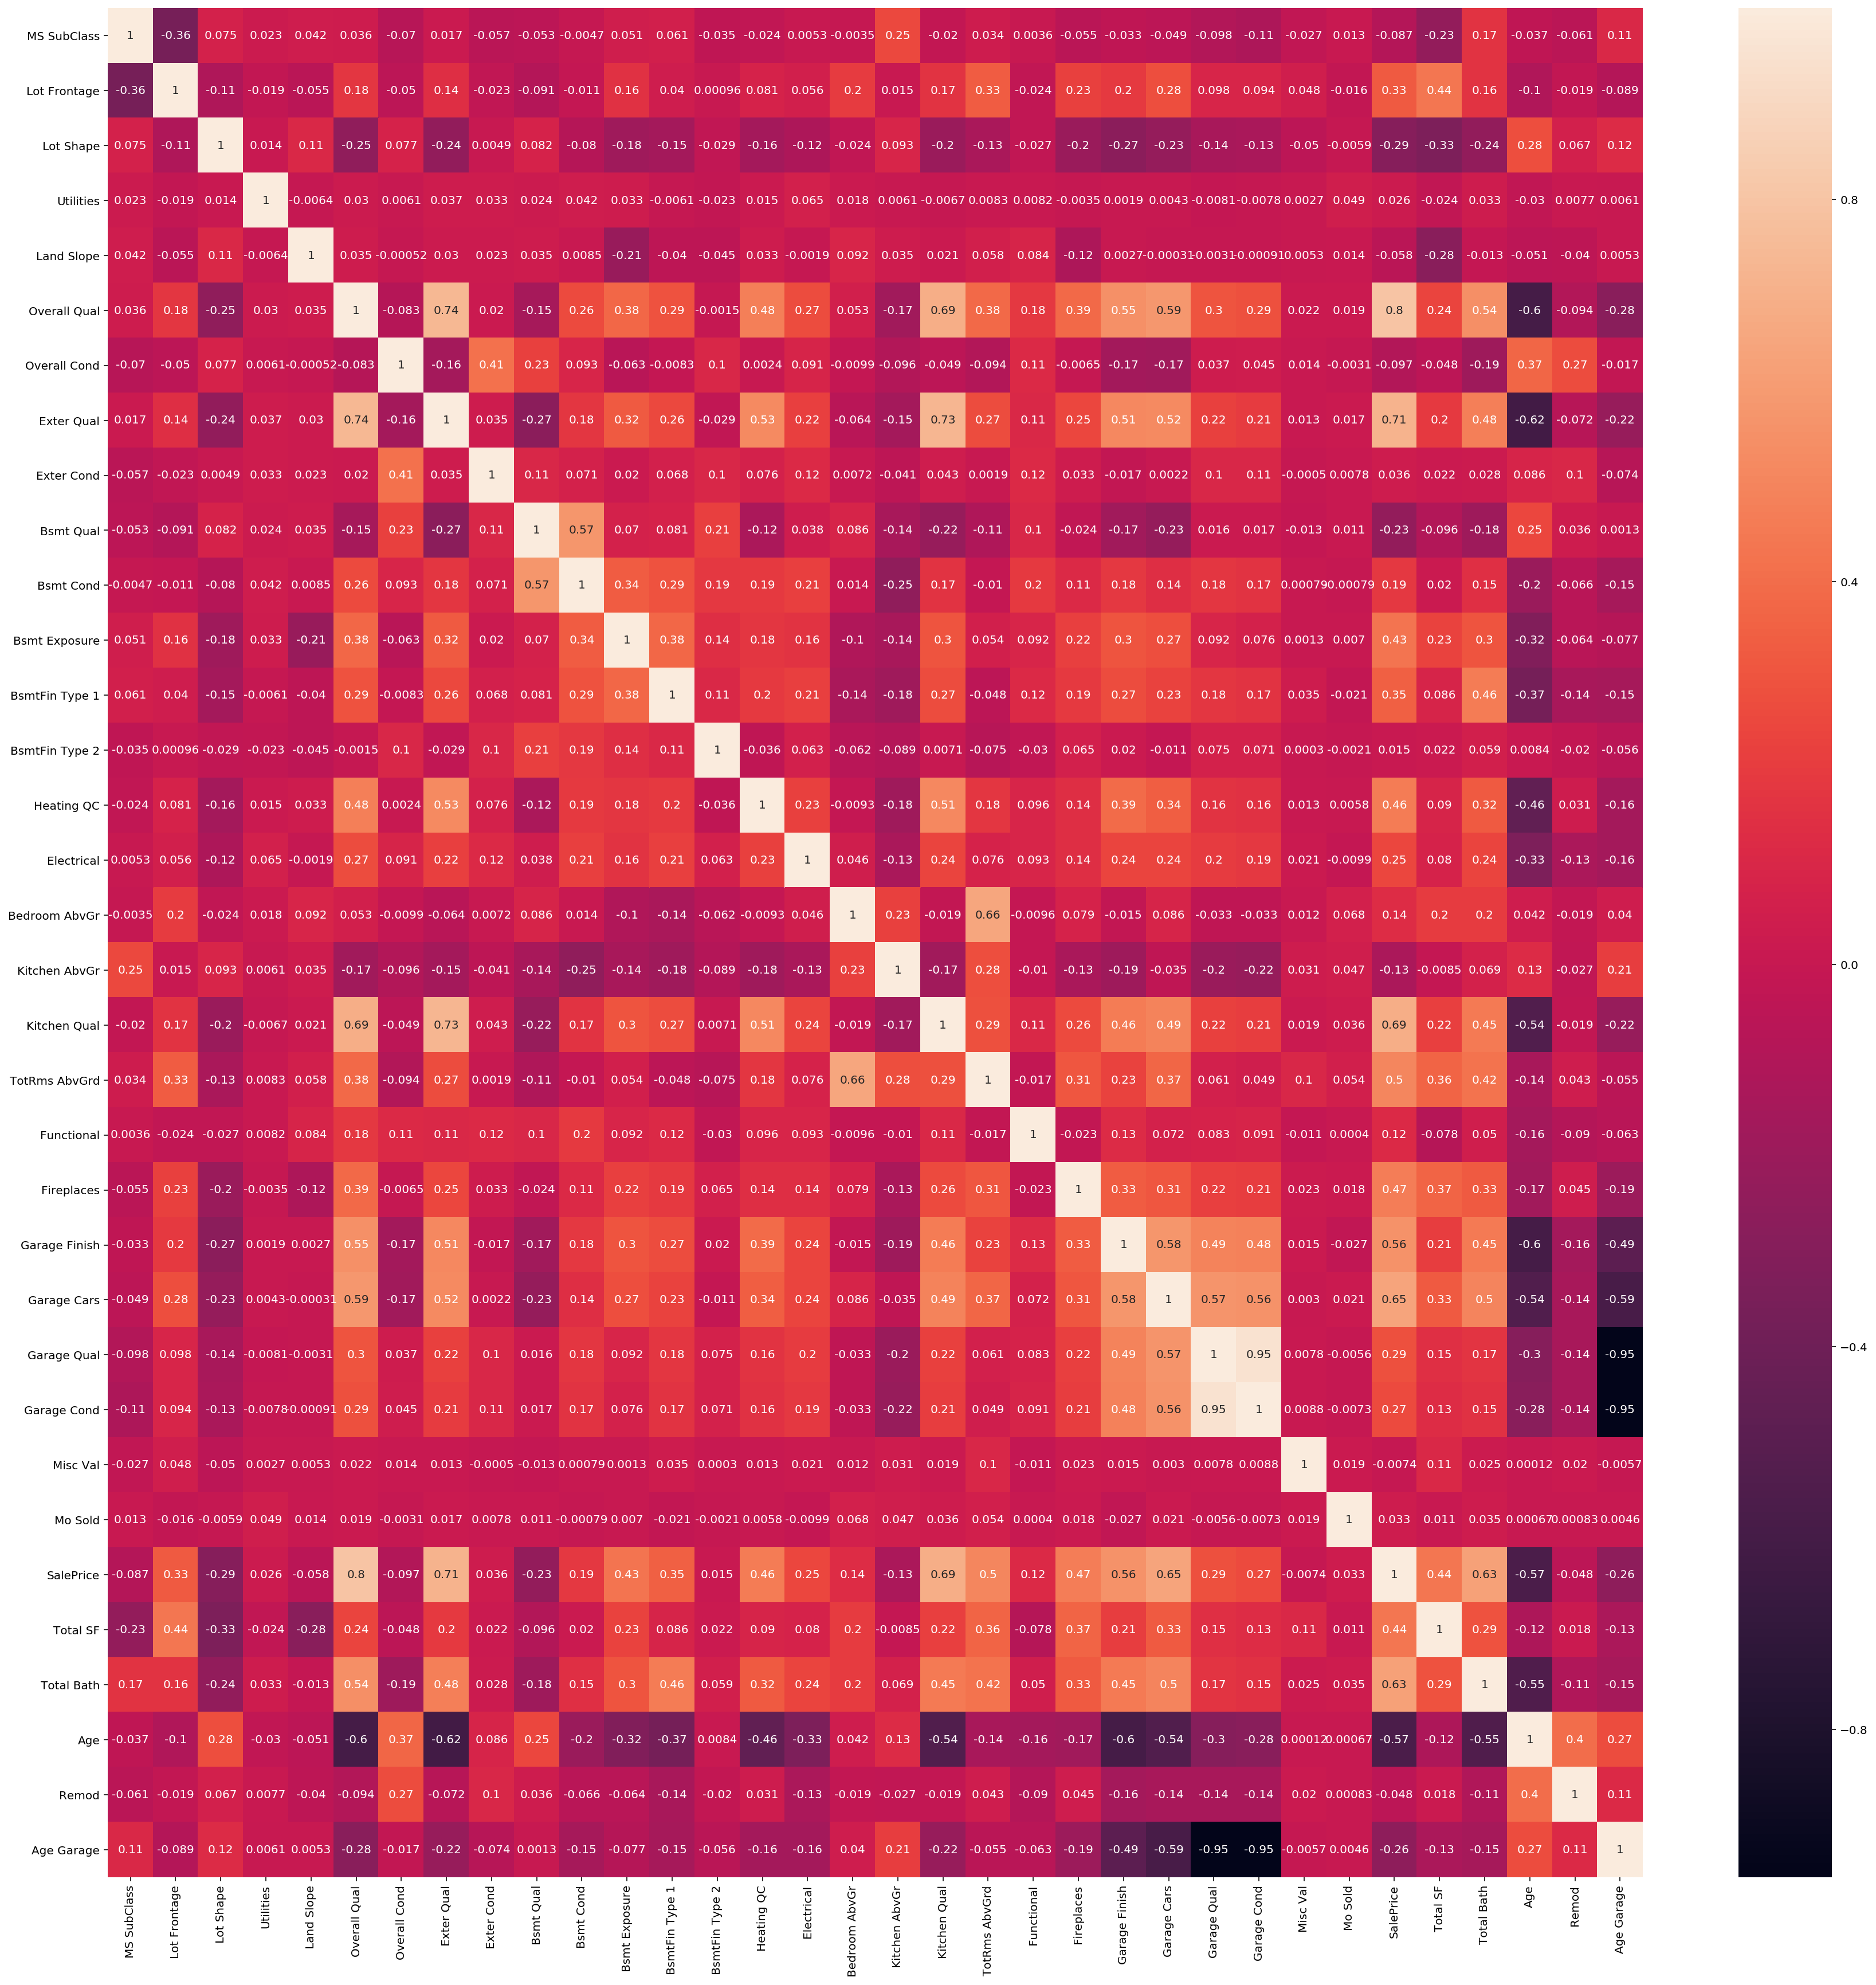

In [70]:
#Check correlation of remaining numerical values with SalesPrice
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True)

We can see that Overall Qual, Exter Qual,Kitchen Quality , Total Bath, Age are the numerical variables with more than 0.5 correlation with SalePrice. 

Among those variables, 
Overall Qual has high correlation with Exter Qual(0.74) and Kitchen Quality(0.64), keep Overall Qual

Garage Finish and Age has correlation of -0.6, keep Age

Numerical variables to keep:
Total Bath, Age, Overall Qual,

Total rooms above ground and bedroom above ground are correlated with 0.66 value, hence only total rooms above ground will be kept.

In [522]:
#Remove all unwanted ordinal and numerical values
main_list = df_train.columns.tolist()
main_list2 = df_train.columns.tolist()
keep = ['Total Bath','Age','Overall Qual']
for i in main_list:
    if i in ordinal or i in numerical:
        main_list2.remove(i)
    if i in keep and i not in main_list2:
        main_list2.append(i)

#Train
main_list2.remove('Bedroom AbvGr')
df_train2 = df_train[main_list2]
#Test
main_list2.remove('SalePrice')
df_test = df_test[main_list2]
print(df_train2.shape)
print(df_test.shape)

(2051, 31)
(879, 30)


In [523]:
df_train2.head()

MS SubClass MS Zoning Street Land Contour Lot Config Neighborhood  \
0           60        RL   Pave          Lvl    CulDSac       Sawyer   
1           60        RL   Pave          Lvl    CulDSac      SawyerW   
2           20        RL   Pave          Lvl     Inside        NAmes   
3           60        RL   Pave          Lvl     Inside       Timber   
4           50        RL   Pave          Lvl     Inside      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style Roof Style Roof Matl  \
0        RRAe        Norm      1Fam      2Story      Gable   CompShg   
1        Norm        Norm      1Fam      2Story      Gable   CompShg   
2        Norm        Norm      1Fam      1Story      Gable   CompShg   
3        Norm        Norm      1Fam      2Story      Gable   CompShg   
4        Norm        Norm      1Fam      1.5Fin      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating Central Air  \
0      HdBoard      Plywood      BrkFace     CBlock    GasA           Y   
1      VinylSd      VinylSd      BrkFace      PConc    GasA           Y   
2      VinylSd      VinylSd         None     CBlock    GasA           Y   
3      VinylSd      VinylSd         None      PConc    GasA           Y   
4      Wd Sdng      Plywood         None      PConc    GasA           Y   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces Garage Type  Garage Cars  \
0              1              6           0      Attchd          2.0   
1              1              8           1      Attchd          2.0   
2              1              5           0      Detchd          1.0   
3              1              7           0     BuiltIn          2.0   
4              1              6           0      Detchd          2.0   

  Paved Drive  Mo Sold Sale Type  SalePrice  Total Bath  Remod  Overall Qual  \
0           Y        3       WD    130500.0         2.5      1             6   
1           Y        4       WD    220000.0         3.5      1             7   
2           Y        1       WD    109000.0         2.0      1             5   
3           Y        4       WD    174000.0         2.5      1             5   
4           N        3       WD    138500.0         2.0      1             6   

   Age  
0   34  
1   13  
2   57  
3    4  
4  110

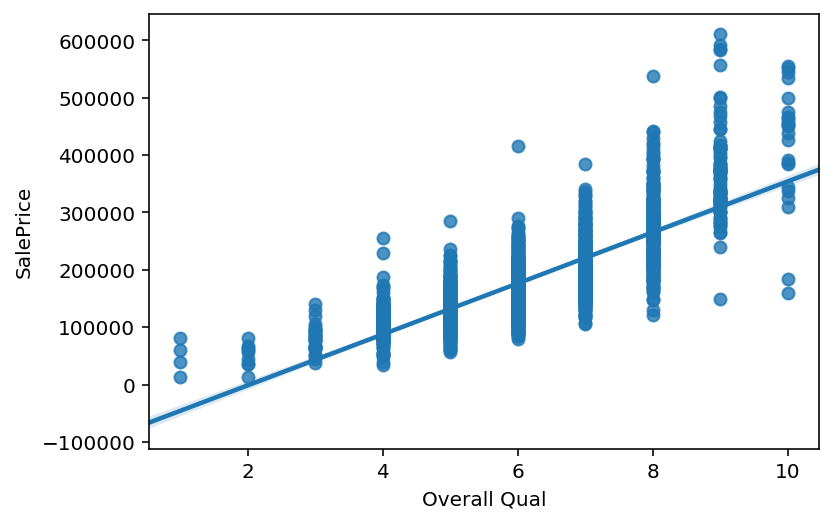

In [171]:
## Find relationship between Overall Qual and SalePrice
sns.regplot(df_train2['Overall Qual'], df_train2['SalePrice'])

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

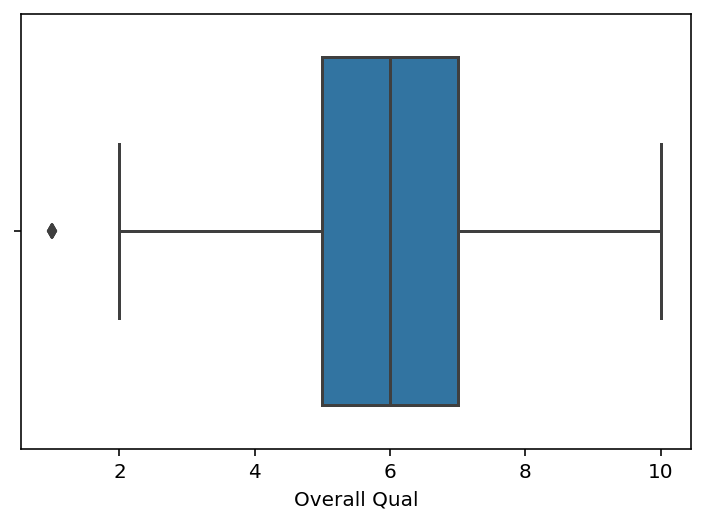

In [172]:
sns.boxplot(df_train2['Overall Qual'])
df_train2['Overall Qual'].value_counts()

In [245]:
#Remove outlier where overall Qual = 1
df_train2[df_train2['Overall Qual']==1]

MS SubClass MS Zoning Street Land Contour Lot Config Neighborhood  \
183            20   A (agr)   Pave          Low     Inside       IDOTRR   
635            20   A (agr)   Pave          Lvl     Inside      Mitchel   
1372           30        RL   Pave          Low     Inside      Edwards   
1428           20        RL   Pave          Low     Inside      BrkSide   

     Condition 1 Condition 2 Bldg Type House Style Roof Style Roof Matl  \
183         Norm        Norm      1Fam      1Story      Gable   CompShg   
635       Artery        Norm      1Fam      1Story      Gable   CompShg   
1372        Norm        Norm      1Fam      1Story      Gable   CompShg   
1428        Norm        Norm      1Fam      1Story      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating Central Air  \
183       AsbShng      VinylSd         None       Slab    Wall           N   
635        CBlock      VinylSd         None     CBlock    GasA           Y   
1372      Wd Sdng      Wd Sdng         None     BrkTil    GasA           N   
1428      VinylSd      VinylSd         None       Slab    GasA           N   

      Kitchen AbvGr  TotRms AbvGrd  Fireplaces Garage Type  Garage Cars  \
183               1              4           0      Attchd          2.0   
635               1              6           0      Attchd          1.0   
1372              1              4           0          NA          0.0   
1428              1              2           0          NA          0.0   

     Paved Drive  Mo Sold Sale Type  SalePrice  Total Bath  Remod  \
183            N        2       WD     13100.0         1.0      0   
635            N        5       WD     81500.0         1.5      0   
1372           Y        3       WD     61000.0         1.5      1   
1428           N        1       WD     39300.0         1.0      1   

      Overall Qual  Age  
183              1   56  
635              1   55  
1372             1   87  
1428             1   61

In [524]:
#Drop rows
df_train2.drop(183,axis=0,inplace=True)
df_train2.drop(635,axis=0,inplace=True)
df_train2.drop(1372,axis=0,inplace=True)
df_train2.drop(1428,axis=0,inplace=True)

df_train2.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(2047, 31)

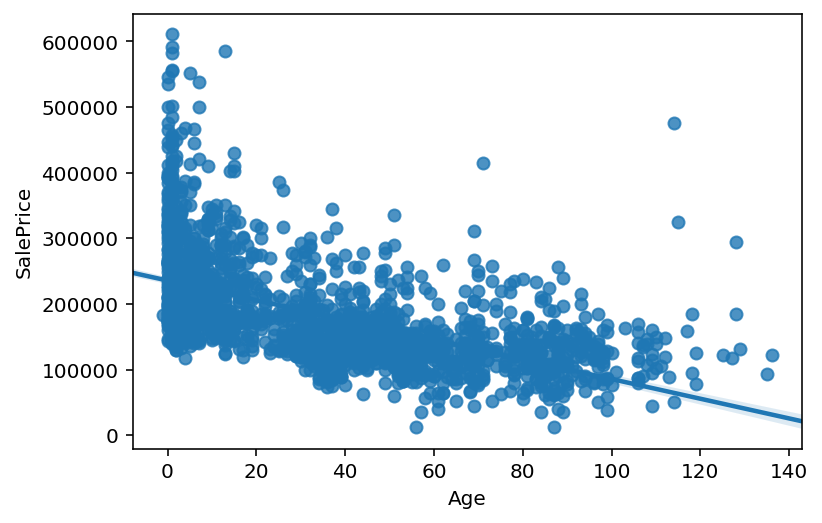

In [168]:
#Find relationship between Age and SalePrice
sns.regplot(df_train['Age'], df_train['SalePrice'])

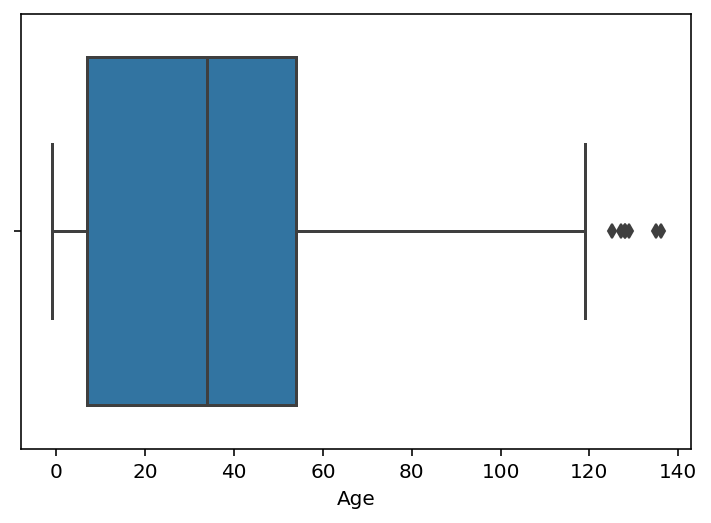

In [248]:
sns.boxplot(df_train2['Age'])

In [249]:
#Find outlier in Age
df_train2[df_train2['Age']>120]

MS SubClass MS Zoning Street Land Contour Lot Config Neighborhood  \
12             70        RL   Pave          Bnk        FR2      SawyerW   
136            50        RL   Pave          Lvl     Inside       Sawyer   
394           190        RM   Pave          Lvl     Inside      OldTown   
784            70        RM   Pave          Lvl     Inside      OldTown   
951            70        RM   Pave          Lvl     Inside      OldTown   
1134           75        RM   Pave          Lvl     Corner      OldTown   
1939           75        RM   Pave          Lvl     Inside      OldTown   

     Condition 1 Condition 2 Bldg Type House Style Roof Style Roof Matl  \
12         Feedr        Norm      1Fam      2Story      Gable   CompShg   
136        Feedr        Norm      1Fam      1.5Fin      Gable   CompShg   
394         Norm        Norm    2fmCon      2Story      Gable   CompShg   
784         Norm        Norm      1Fam      2Story      Gable   CompShg   
951         Norm        Norm      1Fam      2Story      Gable   CompShg   
1134        Norm        Norm      1Fam      2.5Unf      Gable   CompShg   
1939        Norm        Norm      1Fam      2.5Fin      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating Central Air  \
12        HdBoard      HdBoard         None      PConc    GasA           Y   
136       VinylSd      VinylSd         None     CBlock    GasA           N   
394       VinylSd      AsbShng         None      PConc    GasA           Y   
784       Wd Sdng      Wd Sdng         None     BrkTil    GasW           Y   
951       MetalSd      MetalSd         None     BrkTil    OthW           N   
1134      Wd Sdng      Wd Sdng         None      PConc    GasA           Y   
1939      CemntBd      CmentBd         None     BrkTil    GasA           Y   

      Kitchen AbvGr  TotRms AbvGrd  Fireplaces Garage Type  Garage Cars  \
12                1              7           1      Attchd          2.0   
136               1              6           0          NA          0.0   
394               2             11           0      Detchd          2.0   
784               1              8           0      Detchd          1.0   
951               1              8           0          NA          0.0   
1134              1              8           1      Attchd          2.0   
1939              1             10           1      Attchd          3.0   

     Paved Drive  Mo Sold Sale Type  SalePrice  Total Bath  Remod  \
12             P        6       WD    131000.0         1.0      1   
136            N        5       WD     94000.0         1.0      1   
394            N        4       WD    122500.0         2.0      1   
784            N        5       WD    117500.0         2.0      1   
951            Y       12       WD    122000.0         2.0      1   
1134           N        2       WD    185000.0         2.0      1   
1939           Y        5       WD    295000.0         3.0      1   

      Overall Qual  Age  
12               5  129  
136              5  135  
394              4  125  
784              6  127  
951              8  136  
1134             7  128  
1939             7  128

In [525]:
#Drop rows
df_train2.drop(12,axis=0,inplace=True)
df_train2.drop(136,axis=0,inplace=True)
df_train2.drop(394,axis=0,inplace=True)
df_train2.drop(784,axis=0,inplace=True)
df_train2.drop(951,axis=0,inplace=True)
df_train2.drop(1134,axis=0,inplace=True)
df_train2.drop(1939,axis=0,inplace=True)

df_train2.shape

(2040, 31)

In [255]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,50) ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        dataframe[column].value_counts().plot('bar',ax=ax[i])
        #ax[i].hist(dataframe[column], label = list_of_xlabels[i], bins = 20) # feel free to add more settings
        ax[i].set_title(list_of_titles[i],fontsize = 10,fontweight = 4, y = 1.01,alpha=0.8) # Set titles, labels, etc here for each subplot
        #ax[i].set_xlabel(list_of_xlabels[i],fontsize = 5,fontweight = 2, alpha=0.8)
        ax[i].set_ylabel('No. of occurrance',fontsize = 5,fontweight = 2, alpha=0.8)
        ax[i].axhline(y=1200,color='r')

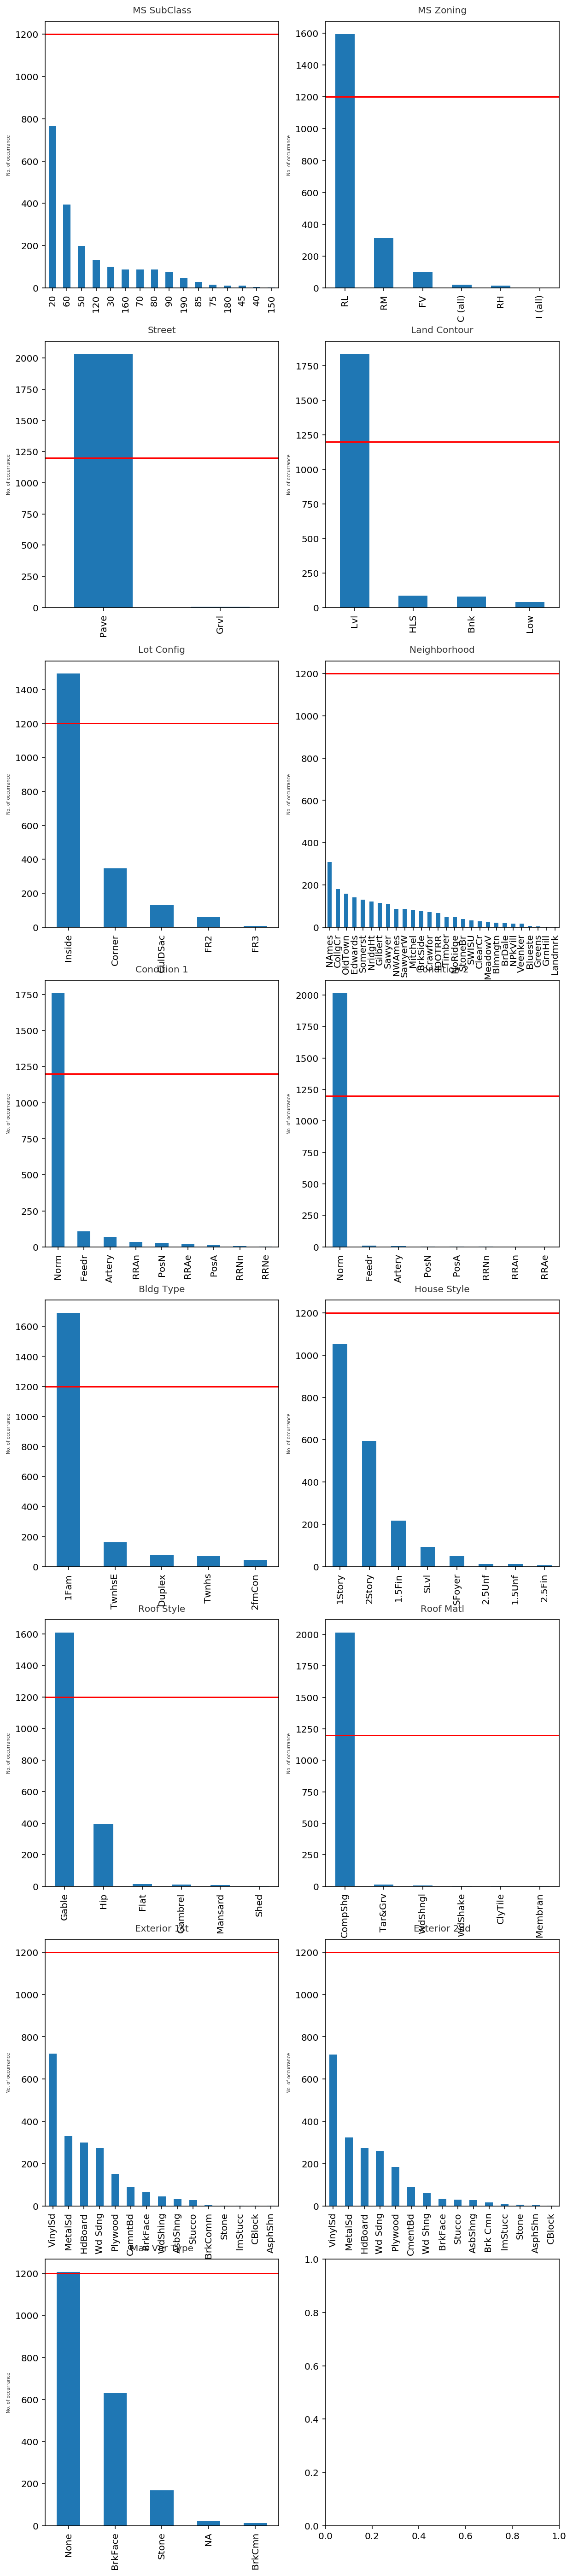

In [256]:
#Plotting histogram for all variables by 2 separate subplot
subplot_histograms(df_train2,df_train2.columns[0:15].tolist(),df_train2.columns[0:15].tolist())

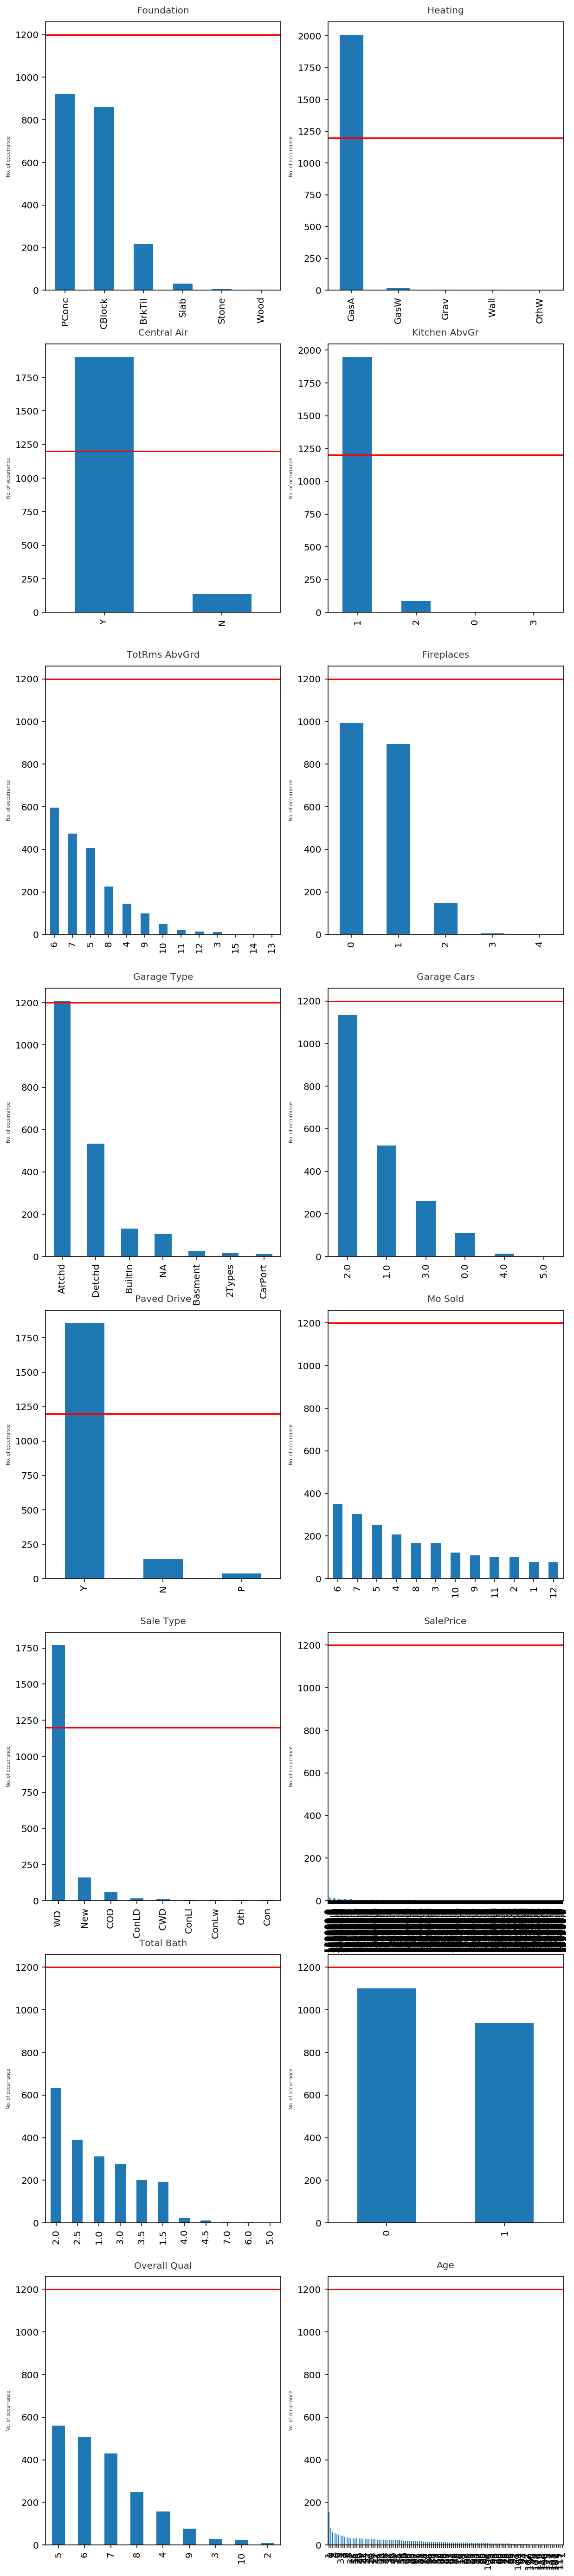

In [258]:
subplot_histograms(df_train2,df_train2.columns[15:].tolist(),df_train2.columns[15:].tolist())

In [526]:
#Keep only columns which did not cross the red line (where no. of observation > 60%)
predictors=['MS SubClass','Neighborhood','House Style','Overall Qual','Exterior 1st','Exterior 2nd','Foundation',
            'TotRms AbvGrd','Fireplaces',
           'Garage Cars','Mo Sold','Total Bath','Remod','Age','SalePrice']

test_predictors=['MS SubClass','Neighborhood','House Style','Overall Qual','Exterior 1st','Exterior 2nd','Foundation',
            'TotRms AbvGrd','Fireplaces','Garage Cars','Mo Sold','Total Bath','Remod','Age']

In [527]:
#Remove unwanted columns
df_train2 = df_train2[predictors]
df_test2 = df_test[test_predictors]
print(df_train2.shape)
print(df_test2.shape)

(2040, 15)
(879, 14)


In [263]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2050
Data columns (total 15 columns):
MS SubClass      2040 non-null int64
Neighborhood     2040 non-null object
House Style      2040 non-null object
Overall Qual     2040 non-null int64
Exterior 1st     2040 non-null object
Exterior 2nd     2040 non-null object
Foundation       2040 non-null object
TotRms AbvGrd    2040 non-null int64
Fireplaces       2040 non-null int64
Garage Cars      2040 non-null float64
Mo Sold          2040 non-null int64
Total Bath       2040 non-null float64
Remod            2040 non-null int64
Age              2040 non-null int64
SalePrice        2040 non-null float64
dtypes: float64(3), int64(7), object(5)
memory usage: 255.0+ KB


In [528]:
numerical = ['SalePrice','Age','Overall Qual']
cat = [x for x in df_train2 if x not in numerical]
cat

['MS SubClass',
 'Neighborhood',
 'House Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Total Bath',
 'Remod']

In [529]:
for i in cat:
    df_train2[i] = df_train2[i].astype('str',inplace=True)
    df_test2[i] = df_test2[i].astype('str',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [530]:
#One hot Encoding for all categorical data
df_train2 = pd.get_dummies(df_train2,cat)
df_test2 = pd.get_dummies(df_test2,cat)
df_train2.head()

Overall Qual  Age  SalePrice  MS SubClass_120  MS SubClass_150  \
0             6   34   130500.0                0                0   
1             7   13   220000.0                0                0   
2             5   57   109000.0                0                0   
3             5    4   174000.0                0                0   
4             6  110   138500.0                0                0   

   MS SubClass_160  MS SubClass_180  MS SubClass_190  MS SubClass_20  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               1   
3                0                0                0               0   
4                0                0                0               0   

   MS SubClass_30  MS SubClass_40  MS SubClass_45  MS SubClass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   MS SubClass_60  MS SubClass_70  MS SubClass_75  MS SubClass_80  \
0               1               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   MS SubClass_85  MS SubClass_90  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0               0               0                     0                     0   
1               0               0                     0                     0   
2               0               0                     0                     0   
3               0               0                     0                     0   
4               0               0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_Greens  Neighborhood_GrnHill  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_IDOTRR  Neighborhood_Landmrk  Neighborhood_MeadowV  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1         

In [531]:
df_test2.head()

Overall Qual  Age  MS SubClass_120  MS SubClass_160  MS SubClass_180  \
0             6   96                0                0                0   
1             5   29                0                0                0   
2             7    0                0                0                0   
3             5   84                0                0                0   
4             6   46                0                0                0   

   MS SubClass_190  MS SubClass_20  MS SubClass_30  MS SubClass_40  \
0                1               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               1               0   
4                0               1               0               0   

   MS SubClass_45  MS SubClass_50  MS SubClass_60  MS SubClass_70  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               1               0   
3               0               0               0               0   
4               0               0               0               0   

   MS SubClass_75  MS SubClass_80  MS SubClass_85  MS SubClass_90  \
0               0               0               0               0   
1               0               0               0               1   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   1                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0            

In [532]:
print(df_train2.shape)
print(df_test2.shape)

(2040, 140)
(879, 129)


In [533]:
#Find missing column
print('Columns missing in test dataset:')
for i in df_train2:
    if i not in df_test2.columns and i != 'SalePrice':
        df_test2[i] = 0
        print(i)
print('\n')       
print('Columns missing in train dataset:')
for i  in df_test2:
    if i not in df_train2.columns:
        df_train2[i] = 0
        print(i)

Columns missing in test dataset:
MS SubClass_150
Neighborhood_GrnHill
Neighborhood_Landmrk
Exterior 1st_CBlock
Exterior 1st_ImStucc
Exterior 1st_Stone
Exterior 2nd_Stone
TotRms AbvGrd_13
TotRms AbvGrd_14
TotRms AbvGrd_15
Fireplaces_4
Garage Cars_5.0
Total Bath_6.0


Columns missing in train dataset:
Exterior 1st_PreCast
Exterior 2nd_Other
Exterior 2nd_PreCast


In [534]:
print(df_train2.shape)
print(df_test2.shape)

(2040, 143)
(879, 142)


In [272]:
X = df_train2[[i for i in df_train2 if i != 'SalePrice']]
y = df_train2['SalePrice']

In [282]:
#no of features
nof_list=np.arange(1,143)           
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 135
Score with 135 features: 0.818512


In [281]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 135)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Overall Qual', 'Age', 'MS SubClass_120', 'MS SubClass_150',
       'MS SubClass_160', 'MS SubClass_180', 'MS SubClass_190',
       'MS SubClass_20', 'MS SubClass_30', 'MS SubClass_40',
       ...
       'Total Bath_2.5', 'Total Bath_3.0', 'Total Bath_3.5', 'Total Bath_4.0',
       'Total Bath_4.5', 'Total Bath_5.0', 'Total Bath_6.0', 'Total Bath_7.0',
       'Remod_0', 'Remod_1'],
      dtype='object', length=135)


In [288]:
#Plot correlation of all categorical data with sales price using Correlation Ratio method
#Plot by dividing the dataframe into 7 different parts

#Part1
tr_prt1 = df_train2.iloc[:,3:28]
tr_prt1['SalePrice'] = df_train2['SalePrice']
nc1 = tr_prt1.columns[:25].tolist()

#Part2
tr_prt2 = df_train2.iloc[:,28:53]
tr_prt2['SalePrice'] = df_train2['SalePrice']
nc2 = tr_prt2.columns[:25].tolist()

#Part3
tr_prt3 = df_train2.iloc[:,53:78]
tr_prt3['SalePrice'] = df_train2['SalePrice']
nc3 = tr_prt3.columns[:25].tolist()

#Part4
tr_prt4 = df_train2.iloc[:,78:103]
tr_prt4['SalePrice'] = df_train2['SalePrice']
nc4 = tr_prt4.columns[:25].tolist()

#Part5
tr_prt5 = df_train2.iloc[:,103:128]
tr_prt5['SalePrice'] = df_train2['SalePrice']
nc5 = tr_prt5.columns[:25].tolist()

#Part6
tr_prt6 = df_train2.iloc[:,128:]
tr_prt6['SalePrice'] = df_train2['SalePrice']
nc6 = tr_prt6.columns[:15].tolist()

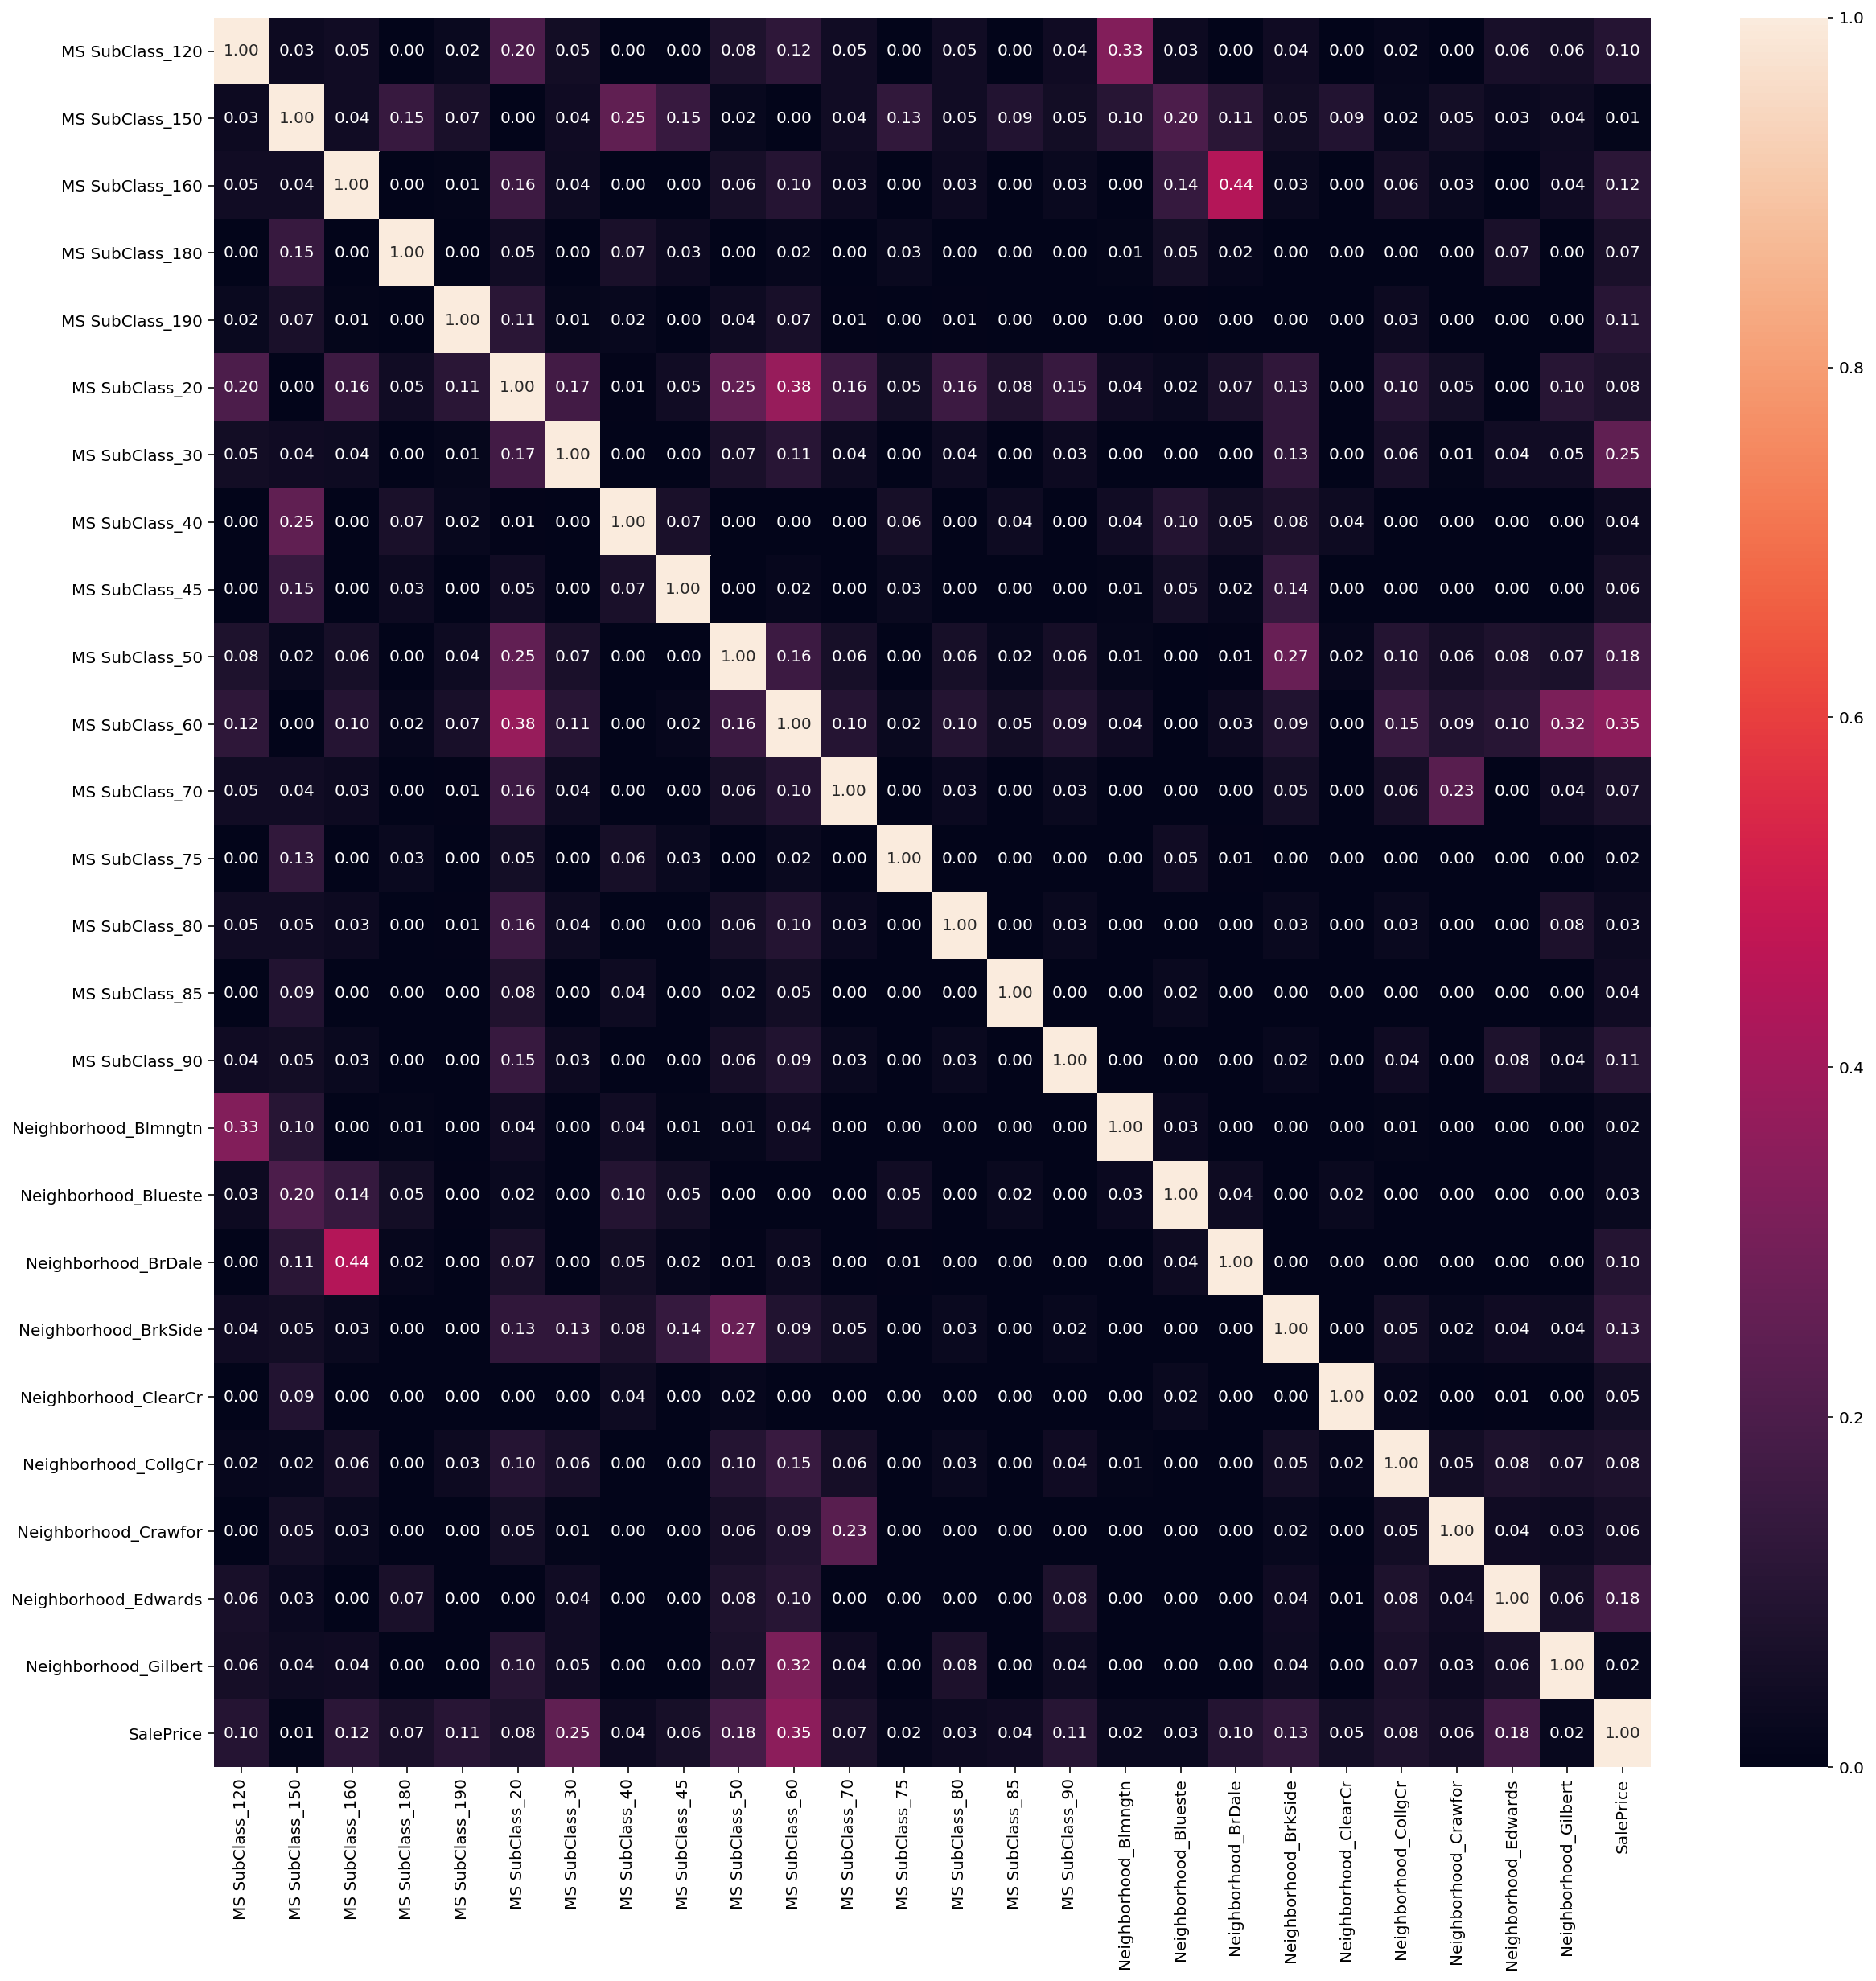

In [289]:
#Plot 7 different heatmap and choos eonly variables that correlate with SalePrice >=0.45
associations(tr_prt1,nominal_columns = nc1,figsize=(20,20))

No variables >= 0.45 from this heatmap

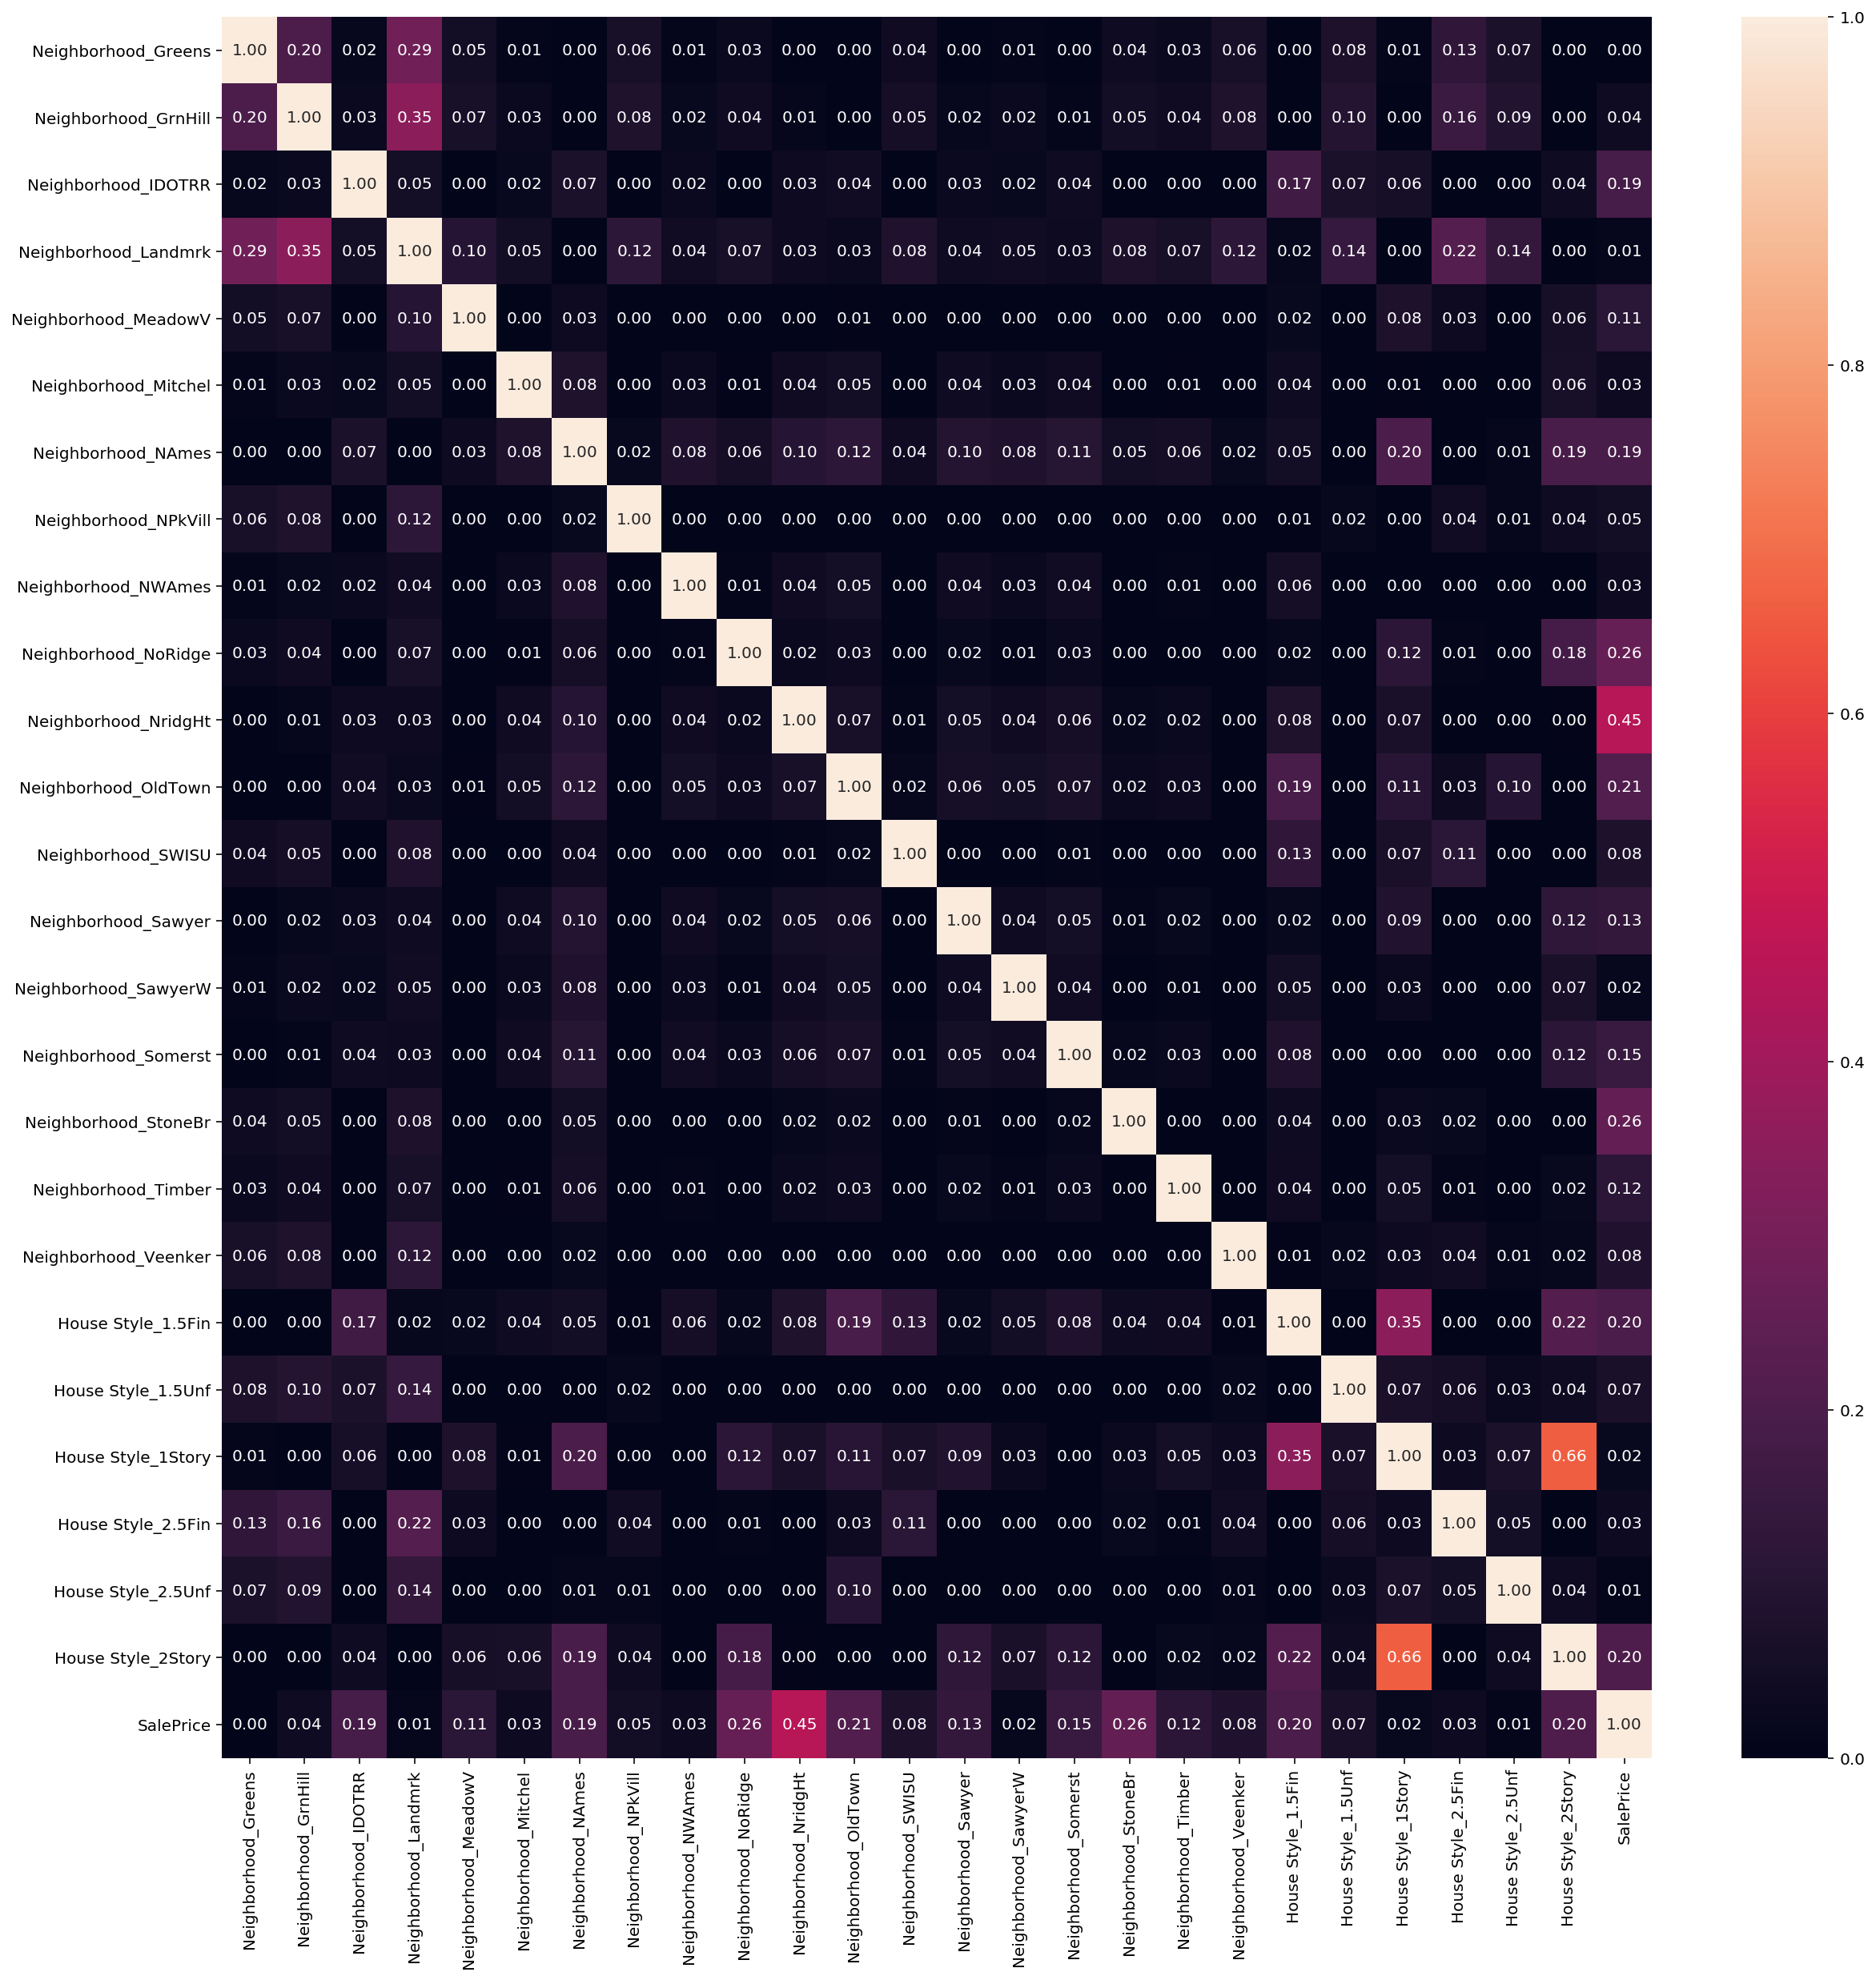

In [290]:
associations(tr_prt2,nominal_columns = nc2,figsize=(20,20))

Neighborhood_NridgHt = 0.45

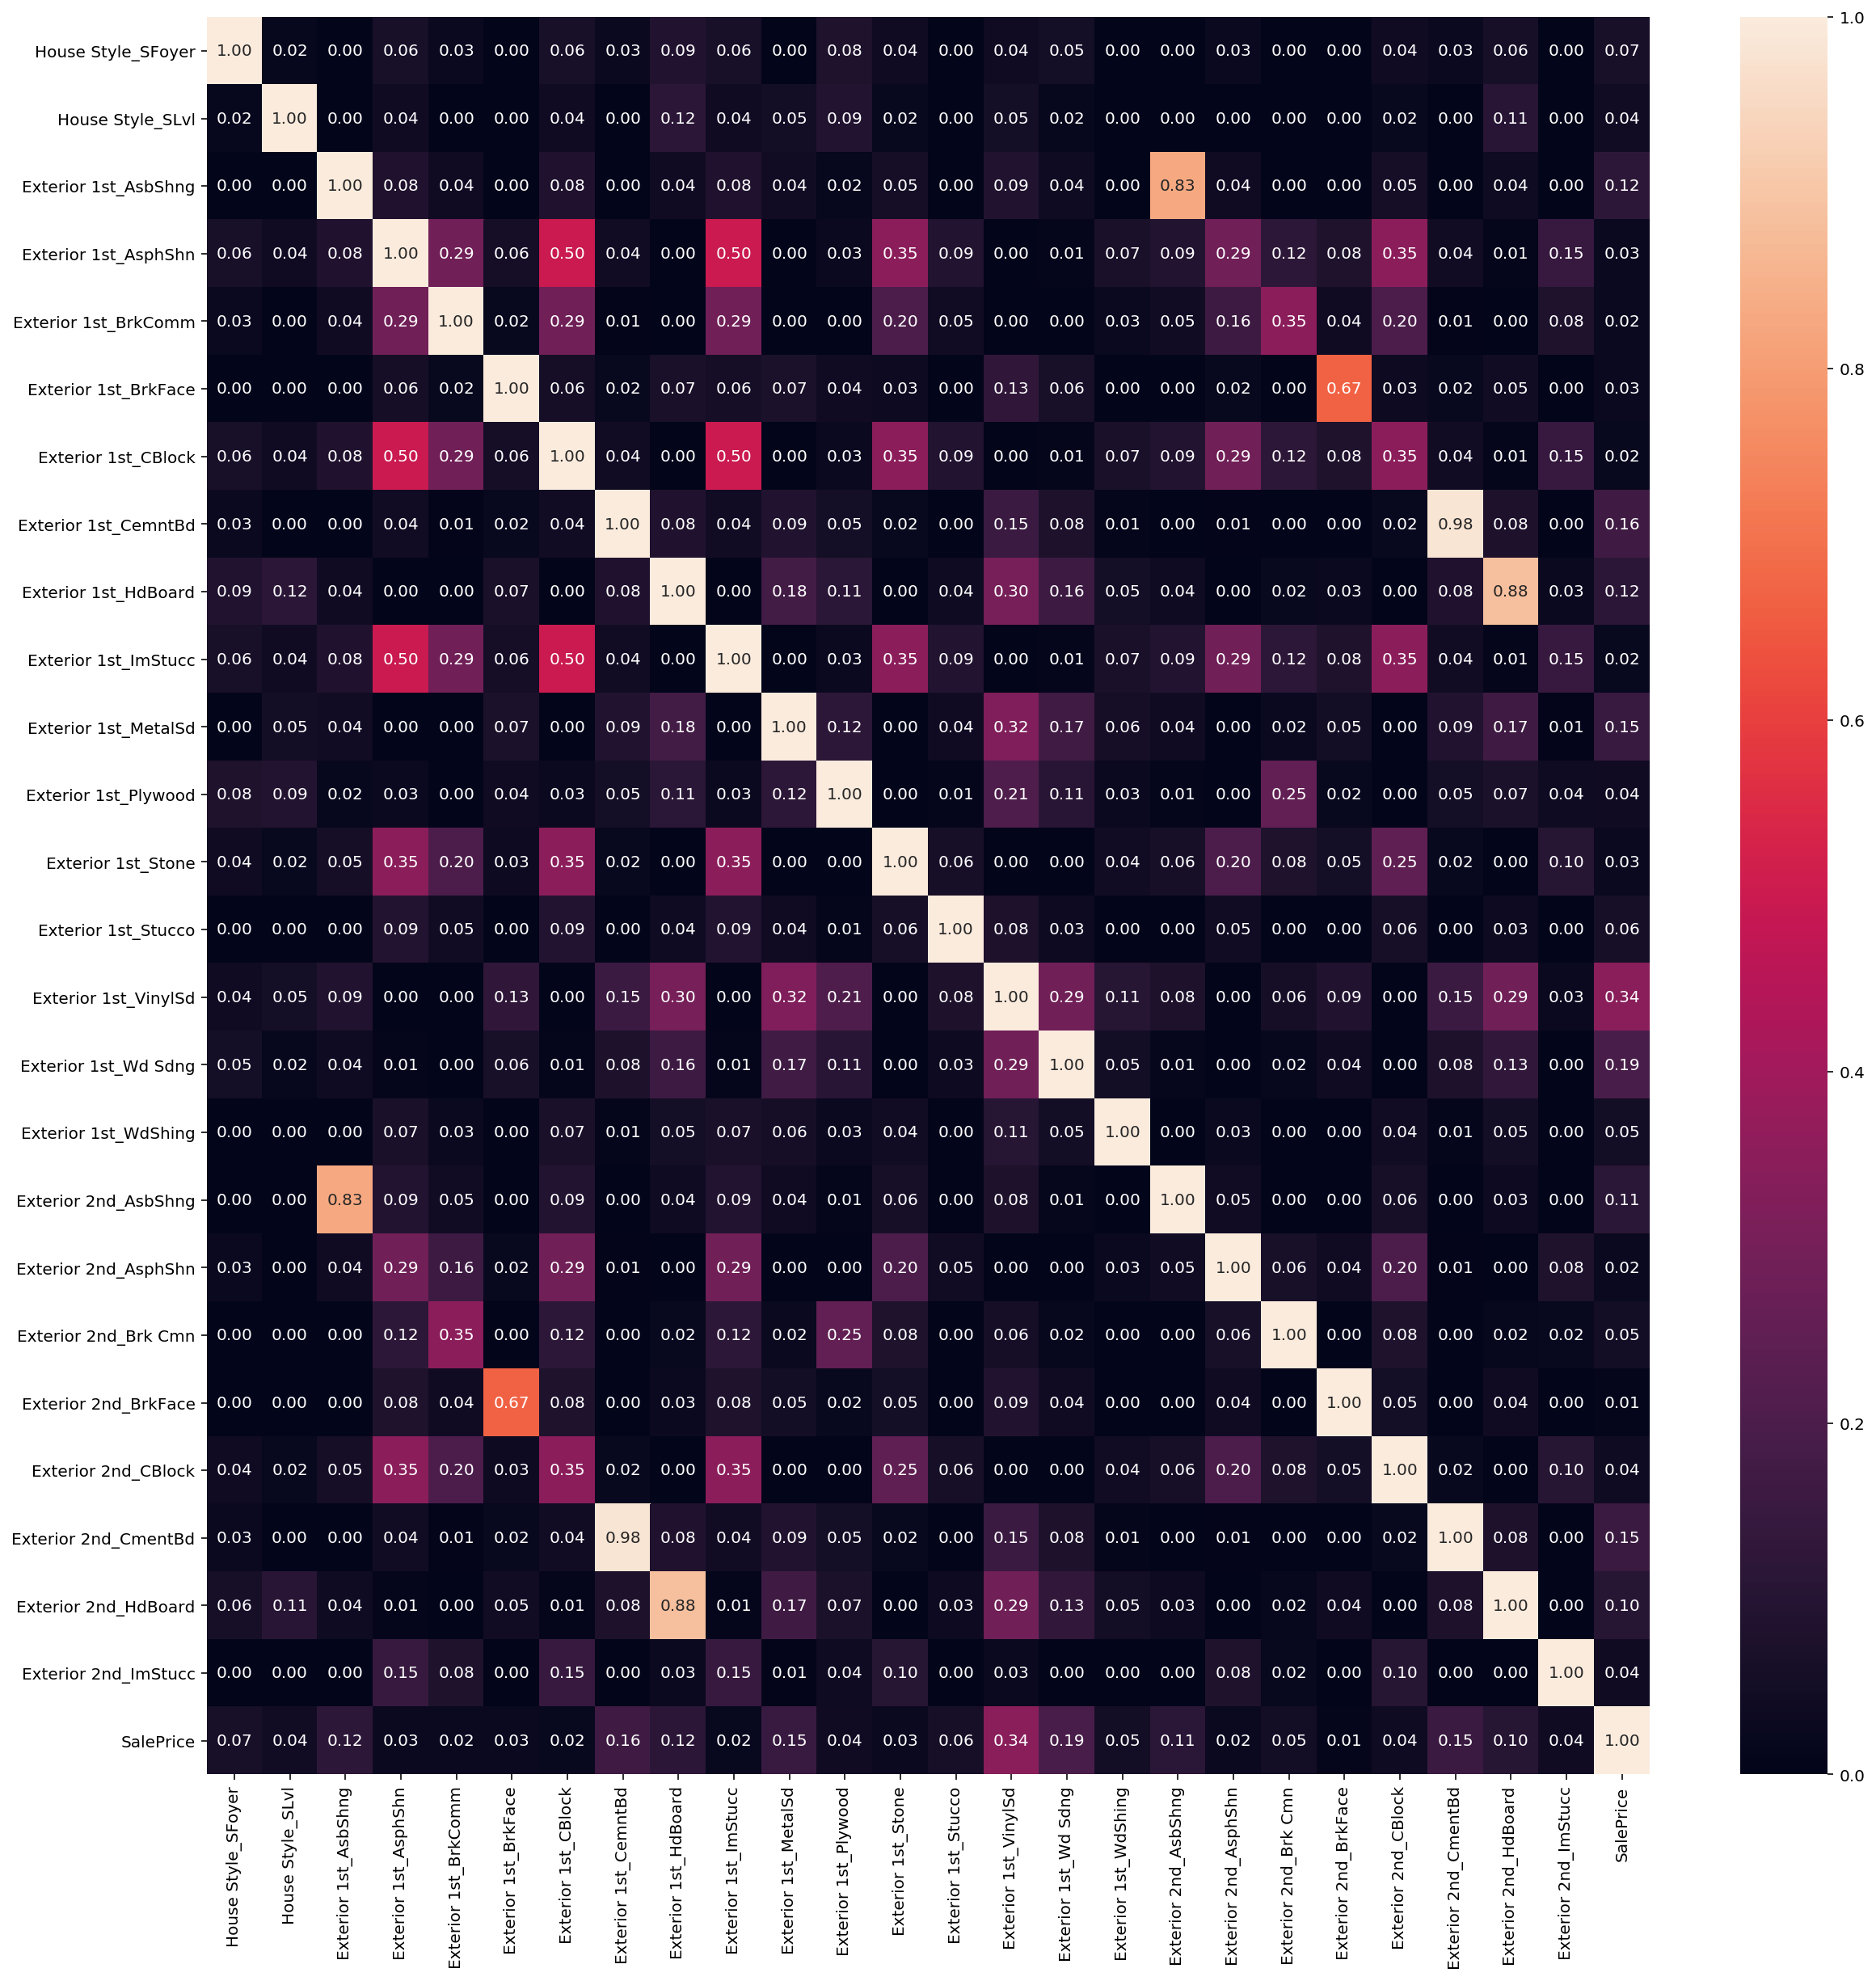

In [291]:
associations(tr_prt3,nominal_columns = nc3,figsize=(20,20))

No variables >= 0.45 from this heatmap

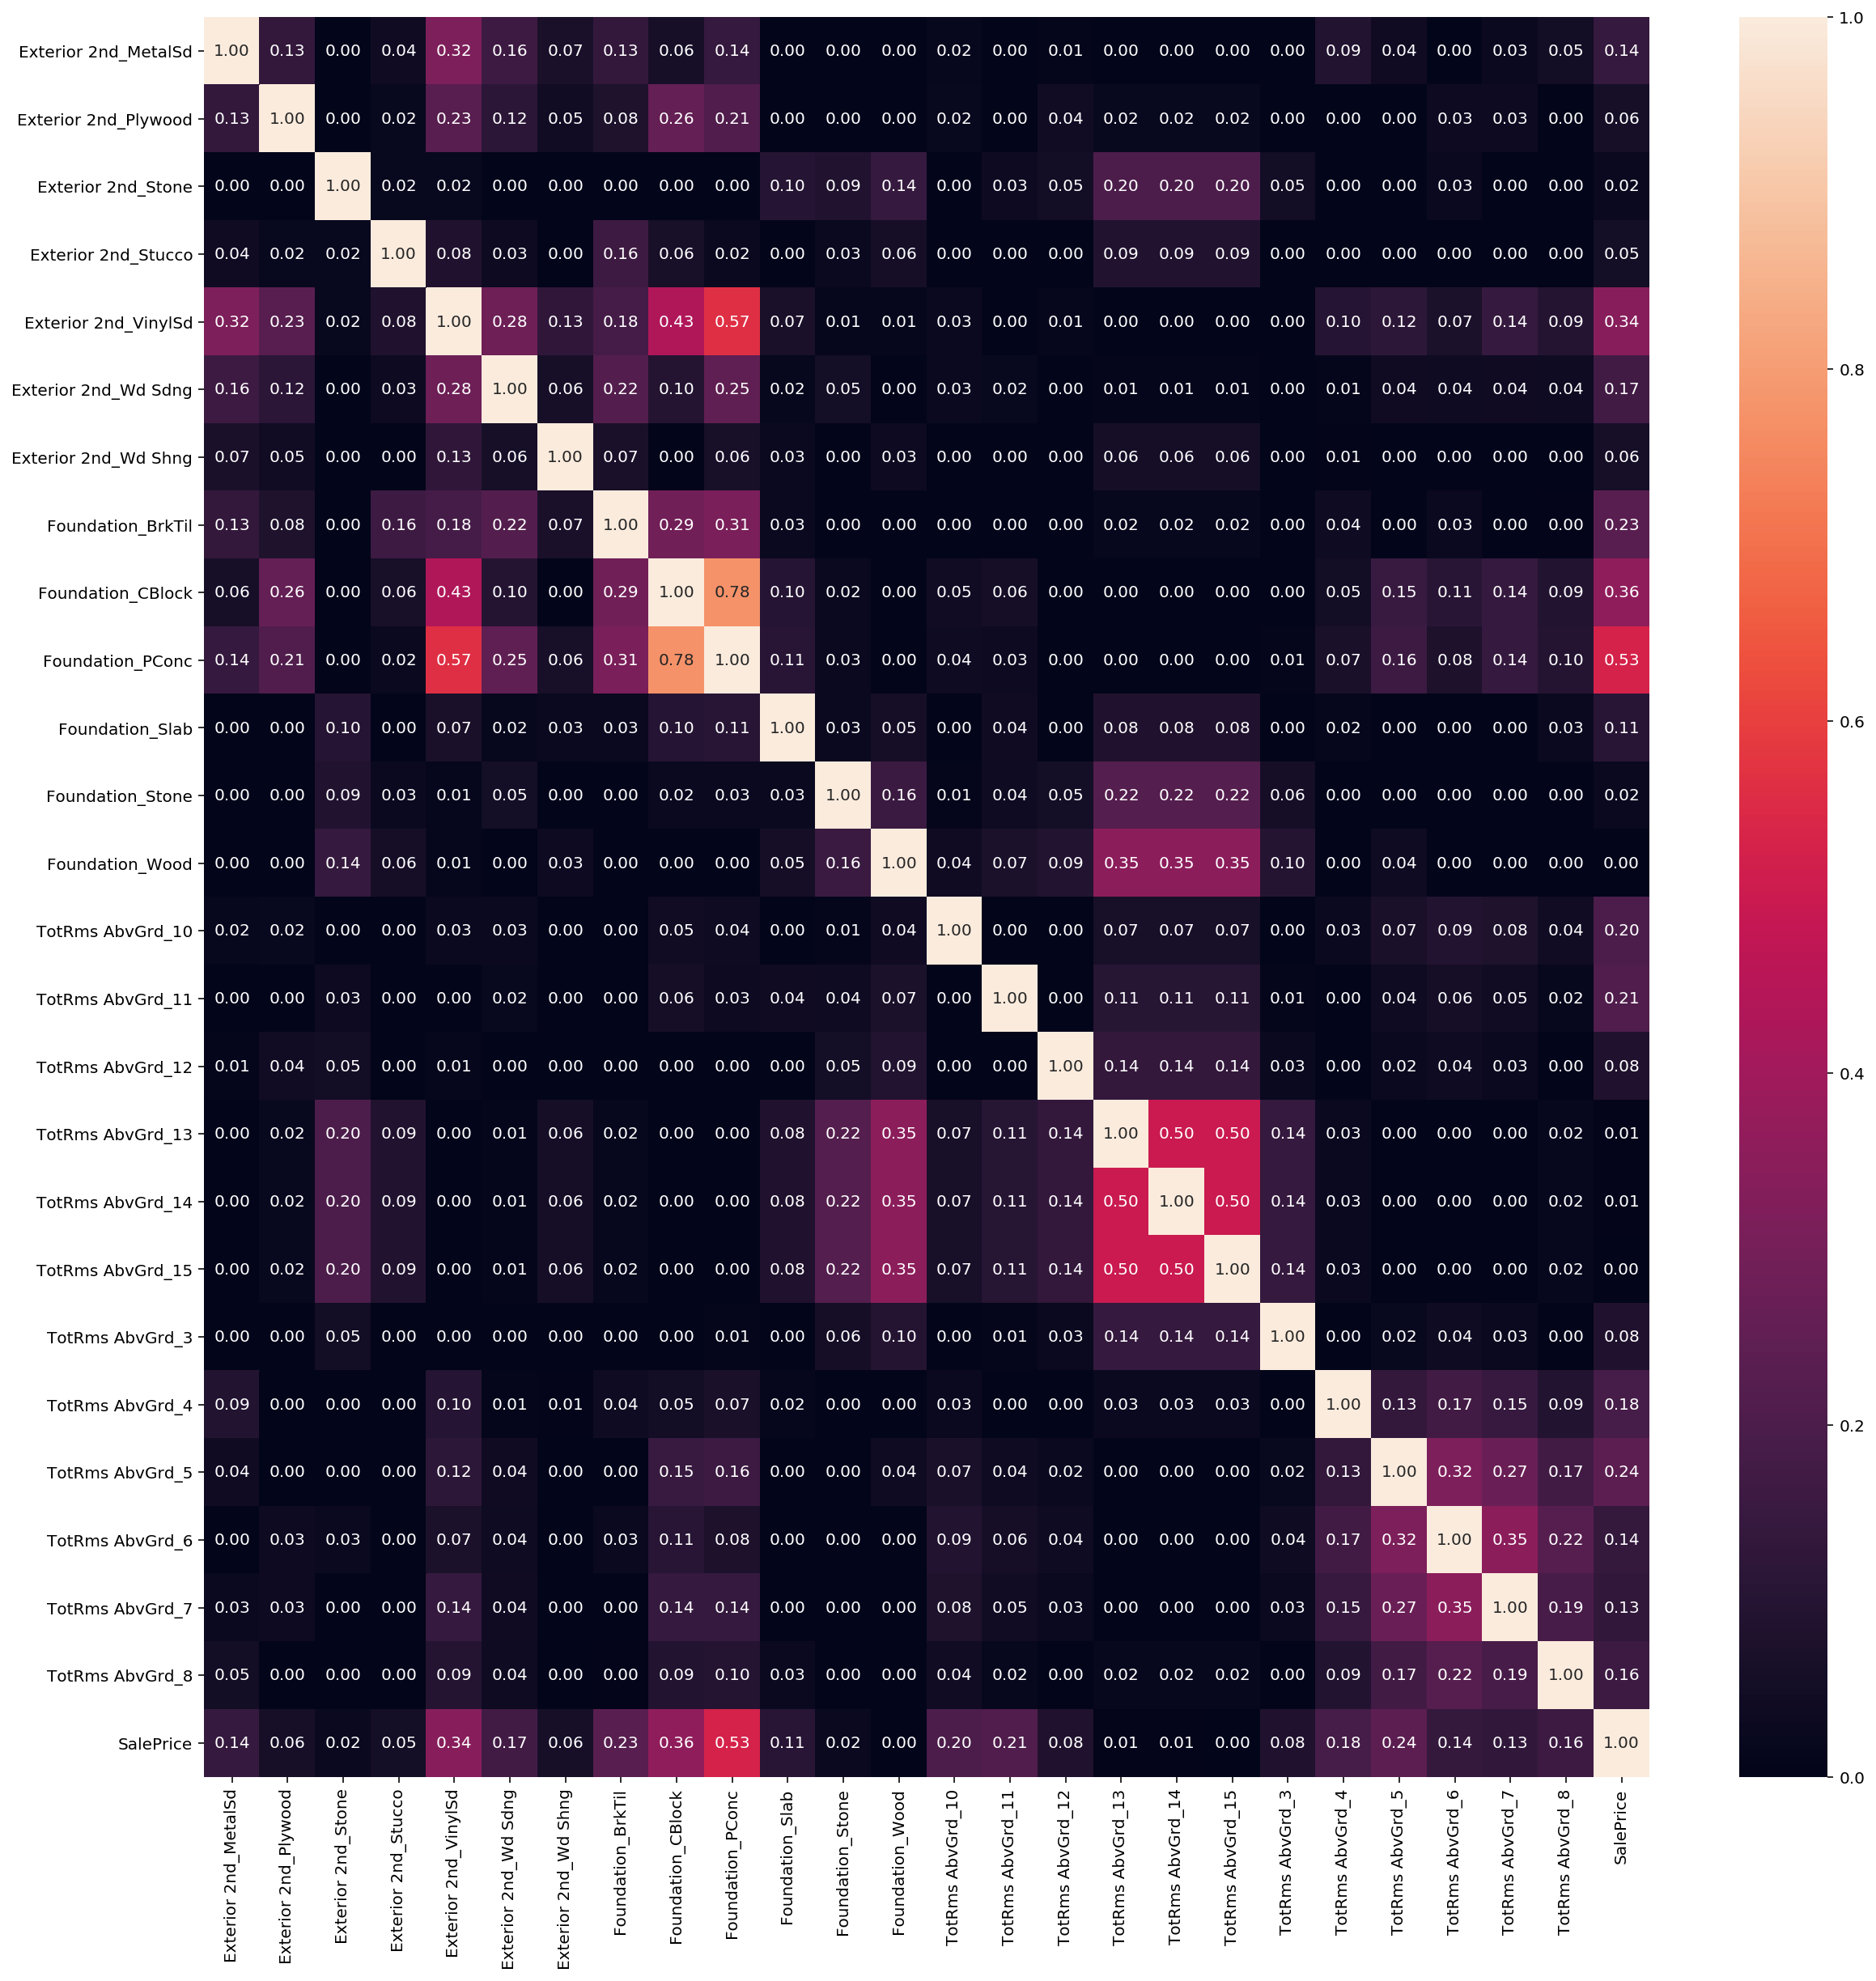

In [292]:
associations(tr_prt4,nominal_columns = nc4,figsize=(20,20))

Foundation_PConc > 0.45

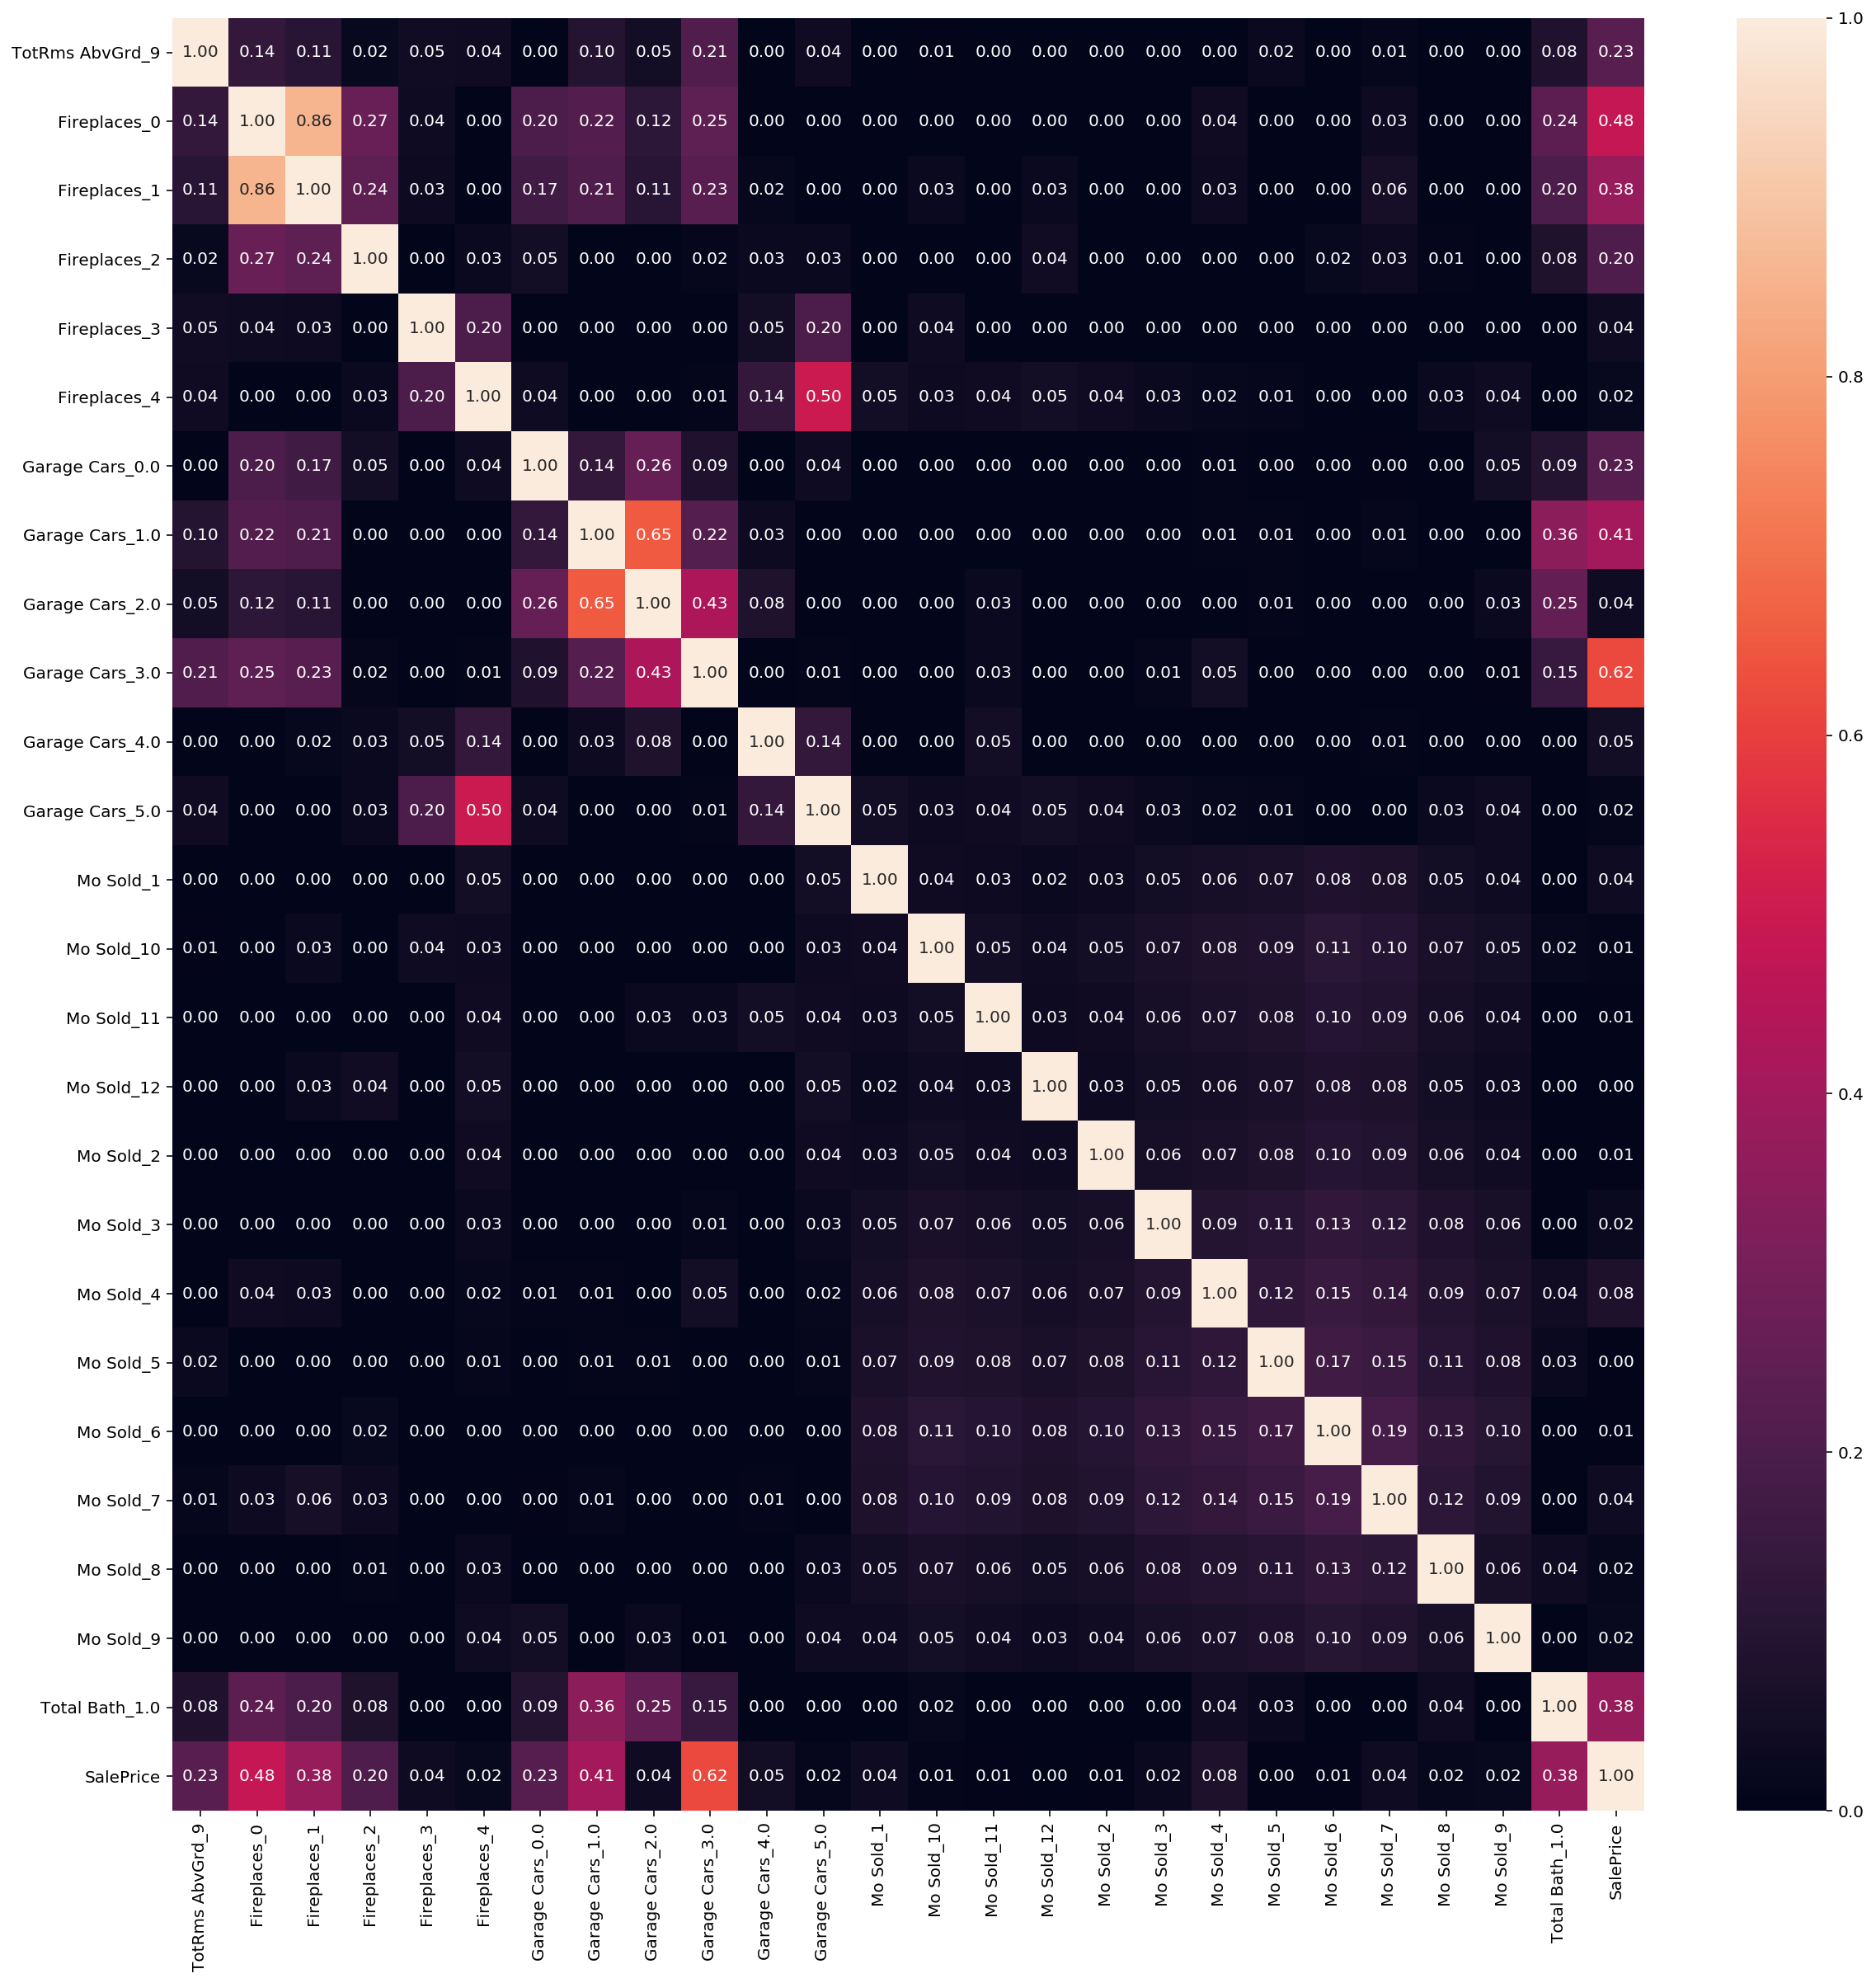

In [293]:
associations(tr_prt5,nominal_columns = nc5,figsize=(20,20))

Fireplace_0, Garage Cars_3.0 > 0.45

C:\Users\Dfait\OneDrive\Datasci\GA\DSI 12 Work Area\classes\Project1234\project_2\Code\dython\nominal.py:88: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


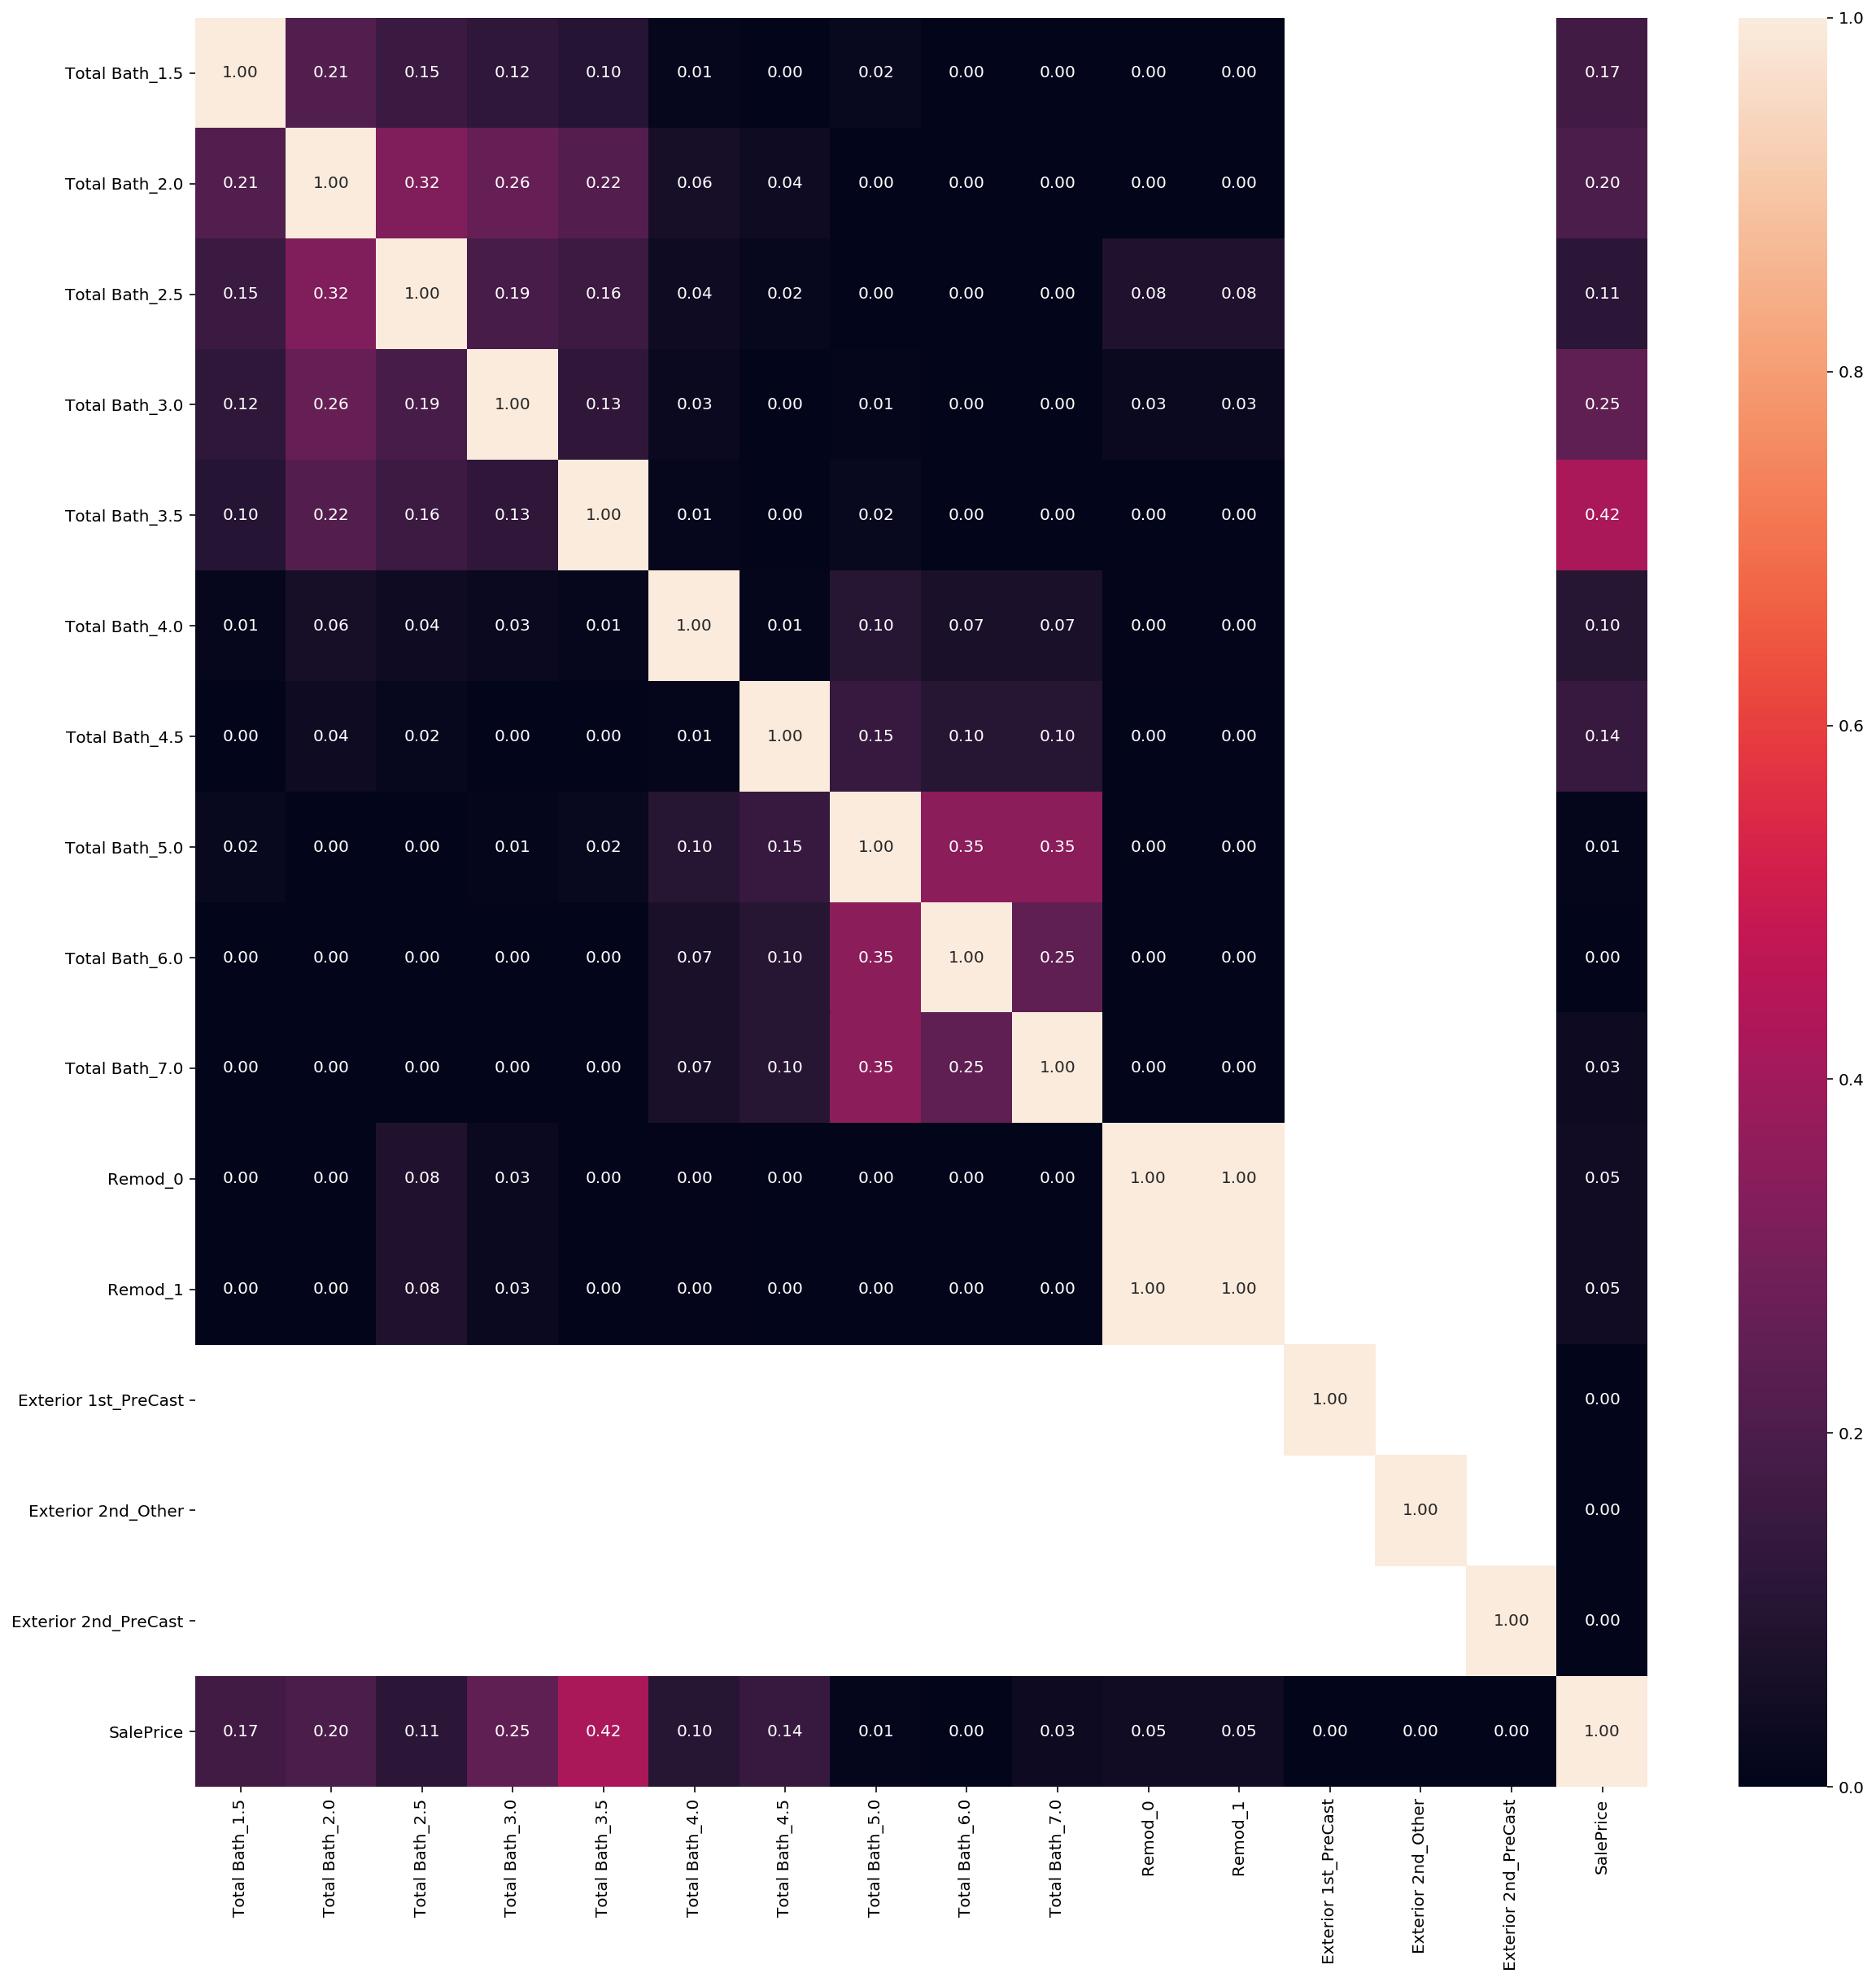

In [294]:
associations(tr_prt6,nominal_columns = nc6,figsize=(20,20))

'Total Bath_3.5 > 0.45

In [535]:
#Keeping variables with correlation >= 0.46
variable = ['Neighborhood_NridgHt','Foundation_PConc','Fireplaces_0','Garage Cars_3.0','Overall Qual','Age','SalePrice']
Predictors =[]
for i in df_train2:
    for j in variable:
        if i.split(sep='_')[0] == j.split(sep='_')[0]:
            if i not in Predictors:
                Predictors.append(i)

Test_Predictors = [i for i in Predictors if i != 'SalePrice']
print(len(Predictors))
print(len(Test_Predictors))

48
47


In [536]:
df_train2 = df_train2[variable]
df_train2.head()

Neighborhood_NridgHt  Foundation_PConc  Fireplaces_0  Garage Cars_3.0  \
0                     0                 0             1                0   
1                     0                 1             0                0   
2                     0                 0             1                0   
3                     0                 1             1                0   
4                     0                 1             1                0   

   Overall Qual  Age  SalePrice  
0             6   34   130500.0  
1             7   13   220000.0  
2             5   57   109000.0  
3             5    4   174000.0  
4             6  110   138500.0

In [537]:
#cat_col = [i for i in Predictors if i not in numerical]
#associations(df_train2,nominal_columns = cat_col,theil_u = True,figsize=(20,20))

In [538]:
df_test2 = df_test2[[i for i in variable if i != 'SalePrice']]
df_test2.head()

Neighborhood_NridgHt  Foundation_PConc  Fireplaces_0  Garage Cars_3.0  \
0                     0                 0             1                0   
1                     0                 0             1                0   
2                     0                 1             0                0   
3                     0                 0             1                0   
4                     0                 0             0                0   

   Overall Qual  Age  
0             6   96  
1             5   29  
2             7    0  
3             5   84  
4             6   46

In [539]:
print(df_train2.shape)
print(df_test2.shape)

(2040, 7)
(879, 6)


In [540]:
X = df_train2[[i for i in df_train2 if i !='SalePrice']]
y = df_train2['SalePrice']

## Model Prep: Train/Test Split

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [542]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Model Prep: Instantiate our models

In [543]:
lr = LinearRegression()

In [544]:
lasso = LassoCV(n_alphas=200)

In [545]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross validation
---

Use `cross_val_score` to evaluate all three models.

In [546]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.7278269701430357

In [547]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso_scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

0.7277945790145603

In [548]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.7278279291257466

## Model Fitting and Evaluation

In [549]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [550]:
lr.score(X_train, y_train)

0.7317245841187233

In [551]:
ridge.score(X_train, y_train)

0.731712212041516

In [552]:
lasso.score(X_train, y_train)

0.7317231759735651

In [553]:
pred = lr.predict(X_test)

In [554]:
r2_score(y_test, pred)

0.7676830289373913

In [555]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [556]:
lr.score(X,y)

0.7406396135745894

In [557]:
pred_test = lr.predict(df_test2)

In [560]:
df_ytest = pd.DataFrame(pred_test,columns=['SalePrice'])
df_ytest['Id'] = df_test_Id 
columnsTitles=["Id","SalePrice"]
df_ytest=df_ytest.reindex(columns=columnsTitles)
df_ytest

Id      SalePrice
0    2658  136453.908172
1    2718  127774.985870
2    2414  222603.513994
3    1989  112458.822994
4     625  176076.185004
5     333   97931.911230
6    1327   94590.202966
7     858  126939.558804
8      95  195234.167464
9    1568  180253.320333
10   2482  165391.092823
11   1364  140074.092125
12   2584  174405.330872
13    818  220097.232796
14   2673  166051.060212
15   2089  154006.142677
16   1297  169949.719853
17    790  121091.569342
18   2616  176354.660692
19    720  208193.241107
20    222  149853.294316
21    557  122483.947785
22   1148  191089.585222
23   2766  178582.466202
24    534  196348.070218
25   1452  125825.656049
26    630  109428.143507
27   2648  100762.844071
28    125  156479.870787
29   1904   63911.701260
..    ...            ...
849   933  180810.271711
850  2784  213840.641098
851   972  166504.995578
852   599  177190.087758
853  2614  150099.216916
854  2582  154030.429646
855  1409  163823.254703
856   175   54722.003534
857   352  221178.582462
858   976   97653.435541
859  2134  195791.118841
860   984  129167.364313
861  2396  362227.669555
862  1673  194398.740398
863   404  124990.228983
864   607  148182.440184
865   814  153195.002580
866   868  194955.691775
867  2271  192203.487977
868  1633  209817.919285
869   337  135269.542495
870  2765  124154.801917
871  1746  280218.473025
872   368  308112.217845
873  2806  196069.594529
874  1662  179696.368956
875  1234  177190.087758
876  1373  150410.245693
877  1672  104869.516477
878  1939  147068.537430

[879 rows x 2 columns]